# Elaboratory Data Analysis and Prediction using Desicion Tree and K nearest neighbour classification


To perform Exploratory Data Analysis (EDA) in my dataset containing student assessment scores, I will go through several steps that help me to understand the data’s underlying patterns, spot any inconsistencies or anomalies, and prepare the dataset for predictive modeling.First I need to loads data from multiple sheets of an Excel file into separate pandas DataFrames, adds a column indicating the source sheet to each DataFrame, and then combines these DataFrames into a single DataFrame with a unified index.

In [1]:
import numpy as np
import pandas as pd

xls = pd.ExcelFile('marks.xlsx')
sheets = xls.sheet_names

data_frames = []
specific_data_frames = []

for sheet in sheets:
    df = pd.read_excel(xls, sheet_name=sheet)
    weightage = pd.to_numeric(df.iloc[0], errors='coerce')
    total_marks = pd.to_numeric(df.iloc[1], errors='coerce')
    relevant_columns = [col for col in df.columns if col.startswith('As:') or col.startswith('Qz:')]
    student_marks = df[relevant_columns].apply(pd.to_numeric, errors='coerce')

    normalized_marks = pd.DataFrame()
    for col in relevant_columns:
        normalized_marks[col] = (student_marks[col] / total_marks[col]) * weightage[col]

    normalized_marks['Sheet'] = sheet
    normalized_marks = normalized_marks.iloc[3:]  # Delete the first 3 rows after normalization
    data_frames.append(normalized_marks)

    specific_columns_data = df[['As', 'Qz', 'S-I', 'S-II',"Grade"]].copy()
    specific_columns_data = specific_columns_data.iloc[3:]  # Delete the first 3 rows
    specific_data_frames.append(specific_columns_data)

normalized_data = pd.concat(data_frames, ignore_index=True)
specific_data = pd.concat(specific_data_frames, ignore_index=True)

if 'Unnamed: 0' in normalized_data.columns:
    normalized_data.drop(columns=['Unnamed: 0'], inplace=True)
if 'Unnamed: 0' in specific_data.columns:
    specific_data.drop(columns=['Unnamed: 0'], inplace=True)

data = pd.concat([normalized_data, specific_data], axis=1)


In [2]:
data

,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Qz:6,Qz:7,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade
0,1.975000,2.700000,2.571429,3.00000,2.125,2.812500,1.5,0.900000,0.9,0.0,...,1.0,NaN,D1,NaN,NaN,13.20,4.50,9.75,8.62,Pass
1,2.000000,1.860000,1.992857,1.21875,1.875,2.850000,0.3,NaN,0.1,0.0,...,0.4,NaN,D1,NaN,NaN,10.57,1.00,3.37,3.93,Fail
2,2.125000,1.890000,2.571429,2.32500,1.625,1.875000,NaN,NaN,0.2,0.0,...,0.0,2.000000,D1,NaN,NaN,10.78,2.40,6.56,0.93,Fail
3,1.025000,1.260000,1.285714,2.62500,1.750,0.375000,0.2,0.400000,NaN,0.0,...,NaN,2.000000,D1,NaN,NaN,7.94,2.60,5.06,2.81,Fail
4,2.150000,1.950000,2.678571,0.37500,2.750,0.937500,0.6,0.200000,0.0,0.0,...,NaN,NaN,D1,NaN,NaN,10.46,0.80,4.50,2.25,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2.330769,2.121429,0.000000,2.85000,2.200,1.533333,1.2,1.133333,0.1,0.0,...,0.8,0.333333,D7,2.0,NaN,11.03,5.46,6.56,2.90,Fail
273,1.430769,0.000000,1.900000,1.80000,2.175,2.233333,0.0,1.333333,0.0,0.2,...,0.0,1.000000,D7,2.0,NaN,9.53,5.13,3.37,1.59,Fail
274,1.938462,2.185714,1.483333,1.68000,2.000,1.600000,0.8,0.933333,0.2,0.0,...,1.2,1.166667,D7,2.0,NaN,9.40,7.10,5.25,1.50,Fail
275,2.884615,2.571429,2.800000,2.43000,2.750,2.866667,1.8,0.800000,0.0,0.0,...,1.0,0.333333,D7,2.0,NaN,13.87,6.20,8.06,4.31,Pass


In [3]:
data = data.round(3)
data

,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Qz:6,Qz:7,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade
0,1.975,2.700,2.571,3.000,2.125,2.812,1.5,0.900,0.9,0.0,...,1.0,NaN,D1,NaN,NaN,13.20,4.50,9.75,8.62,Pass
1,2.000,1.860,1.993,1.219,1.875,2.850,0.3,NaN,0.1,0.0,...,0.4,NaN,D1,NaN,NaN,10.57,1.00,3.37,3.93,Fail
2,2.125,1.890,2.571,2.325,1.625,1.875,NaN,NaN,0.2,0.0,...,0.0,2.000,D1,NaN,NaN,10.78,2.40,6.56,0.93,Fail
3,1.025,1.260,1.286,2.625,1.750,0.375,0.2,0.400,NaN,0.0,...,NaN,2.000,D1,NaN,NaN,7.94,2.60,5.06,2.81,Fail
4,2.150,1.950,2.679,0.375,2.750,0.938,0.6,0.200,0.0,0.0,...,NaN,NaN,D1,NaN,NaN,10.46,0.80,4.50,2.25,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2.331,2.121,0.000,2.850,2.200,1.533,1.2,1.133,0.1,0.0,...,0.8,0.333,D7,2.0,NaN,11.03,5.46,6.56,2.90,Fail
273,1.431,0.000,1.900,1.800,2.175,2.233,0.0,1.333,0.0,0.2,...,0.0,1.000,D7,2.0,NaN,9.53,5.13,3.37,1.59,Fail
274,1.938,2.186,1.483,1.680,2.000,1.600,0.8,0.933,0.2,0.0,...,1.2,1.167,D7,2.0,NaN,9.40,7.10,5.25,1.50,Fail
275,2.885,2.571,2.800,2.430,2.750,2.867,1.8,0.800,0.0,0.0,...,1.0,0.333,D7,2.0,NaN,13.87,6.20,8.06,4.31,Pass


In [4]:
data.reset_index(drop=True, inplace=True)
data.index += 1

data

,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Qz:6,Qz:7,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade
1,1.975,2.700,2.571,3.000,2.125,2.812,1.5,0.900,0.9,0.0,...,1.0,NaN,D1,NaN,NaN,13.20,4.50,9.75,8.62,Pass
2,2.000,1.860,1.993,1.219,1.875,2.850,0.3,NaN,0.1,0.0,...,0.4,NaN,D1,NaN,NaN,10.57,1.00,3.37,3.93,Fail
3,2.125,1.890,2.571,2.325,1.625,1.875,NaN,NaN,0.2,0.0,...,0.0,2.000,D1,NaN,NaN,10.78,2.40,6.56,0.93,Fail
4,1.025,1.260,1.286,2.625,1.750,0.375,0.2,0.400,NaN,0.0,...,NaN,2.000,D1,NaN,NaN,7.94,2.60,5.06,2.81,Fail
5,2.150,1.950,2.679,0.375,2.750,0.938,0.6,0.200,0.0,0.0,...,NaN,NaN,D1,NaN,NaN,10.46,0.80,4.50,2.25,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2.331,2.121,0.000,2.850,2.200,1.533,1.2,1.133,0.1,0.0,...,0.8,0.333,D7,2.0,NaN,11.03,5.46,6.56,2.90,Fail
274,1.431,0.000,1.900,1.800,2.175,2.233,0.0,1.333,0.0,0.2,...,0.0,1.000,D7,2.0,NaN,9.53,5.13,3.37,1.59,Fail
275,1.938,2.186,1.483,1.680,2.000,1.600,0.8,0.933,0.2,0.0,...,1.2,1.167,D7,2.0,NaN,9.40,7.10,5.25,1.50,Fail
276,2.885,2.571,2.800,2.430,2.750,2.867,1.8,0.800,0.0,0.0,...,1.0,0.333,D7,2.0,NaN,13.87,6.20,8.06,4.31,Pass


In [5]:
data.to_csv('new_data.csv', index=False)  

print("DataFrame saved to new_data.csv")

DataFrame saved to new_data.csv


## Preprocessing
In this code we check for any missing values (null values) in the dataset. Null values can arise due to various reasons, such as incomplete data entry or data corruption. To address this issue, the code removes any rows containing null values using the dropna() function in Pandas. By removing these rows, the code ensures that the analysis is conducted on a complete and consistent dataset, free from missing values that could potentially bias the results.

In [6]:
data.head()

,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Qz:6,Qz:7,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade
1,1.975,2.70,2.571,3.000,2.125,2.812,1.5,0.9,0.9,0.0,...,1.0,NaN,D1,NaN,NaN,13.20,4.5,9.75,8.62,Pass
2,2.000,1.86,1.993,1.219,1.875,2.850,0.3,NaN,0.1,0.0,...,0.4,NaN,D1,NaN,NaN,10.57,1.0,3.37,3.93,Fail
3,2.125,1.89,2.571,2.325,1.625,1.875,NaN,NaN,0.2,0.0,...,0.0,2.0,D1,NaN,NaN,10.78,2.4,6.56,0.93,Fail
4,1.025,1.26,1.286,2.625,1.750,0.375,0.2,0.4,NaN,0.0,...,NaN,2.0,D1,NaN,NaN,7.94,2.6,5.06,2.81,Fail
5,2.150,1.95,2.679,0.375,2.750,0.938,0.6,0.2,0.0,0.0,...,NaN,NaN,D1,NaN,NaN,10.46,0.8,4.50,2.25,Fail


In [7]:
# Check for missing values
print(data.isnull().sum())

As:1       3
As:2       3
As:3       7
As:4       5
As:5      13
As:6      26
Qz:1      11
Qz:2      13
Qz:3      18
Qz:4      26
Qz:5      25
Qz:6      75
Qz:7     102
Sheet      0
Qz:8     178
As:7     249
As         2
Qz         0
S-I        1
S-II       1
Grade      0
dtype: int64


This code fills missing values in a DataFrame: numeric columns are filled with their median(left skewed data) to maintain statistical consistency, while categorical data in the 'Grade' column is filled using the most frequent value (mode) to preserve common characteristics. These steps ensure the dataset is complete and ready for further analysis or modeling, avoiding errors related to missing data.

In [8]:
# #fill missing values with the mean for numeric columns
numeric_cols = ['As:1','As:2','As:3','As:4','As:5','As:6','As', 'Qz:1','Qz:2','Qz:3','Qz:4','Qz:5','Qz:6','Qz:7','Qz', 'S-I', 'S-II','Qz:8','As:7']
for col in numeric_cols:
    if data[col].dtype in ['float64', 'int64']: 
        data[col].fillna(0, inplace=True)
        
# #fill missing value with the mode for categorical data
# mode_value = data['Grade'].mode()[0]
# data['Grade'].fillna(mode_value, inplace=True)


In [9]:
print(data.isnull().sum())


As:1     0
As:2     0
As:3     0
As:4     0
As:5     0
As:6     0
Qz:1     0
Qz:2     0
Qz:3     0
Qz:4     0
Qz:5     0
Qz:6     0
Qz:7     0
Sheet    0
Qz:8     0
As:7     0
As       0
Qz       0
S-I      0
S-II     0
Grade    0
dtype: int64


In [10]:
data.isnull()


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Qz:6,Qz:7,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
274,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
275,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
276,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


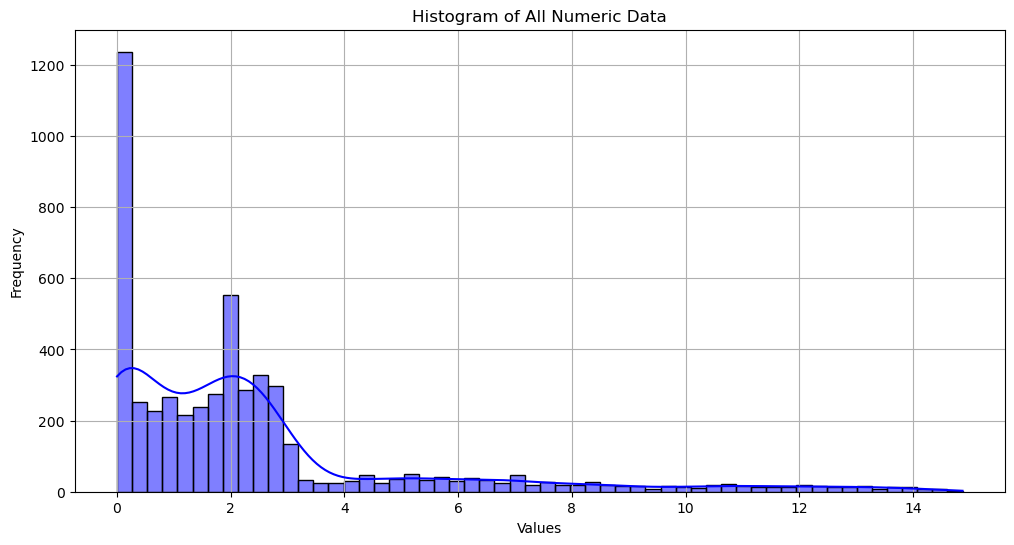

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Flatten all numeric data into a single array
all_numeric_data_clean = data[numeric_cols].values.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(all_numeric_data_clean, kde=True, color='blue')
plt.title('Histogram of All Numeric Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
data.describe().round(3)

,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,Qz:8,As:7,As,Qz,S-I,S-II
count,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000
mean,1.970,2.112,2.093,2.071,1.876,2.003,0.912,0.679,0.557,0.711,0.949,0.707,0.808,0.715,0.152,11.076,5.600,5.725,4.889
std,0.793,0.804,0.751,0.808,0.793,0.960,0.521,0.484,0.549,0.768,0.821,0.713,0.815,0.960,0.614,2.521,1.976,2.352,2.713
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.000,0.000
25%,1.740,1.830,1.821,1.575,1.500,1.575,0.600,0.300,0.100,0.000,0.000,0.000,0.000,0.000,0.000,10.040,4.300,4.120,2.620
50%,2.220,2.340,2.250,2.300,2.000,2.333,0.800,0.667,0.400,0.400,0.667,0.600,0.500,0.000,0.000,11.460,5.800,5.430,4.500
75%,2.475,2.657,2.599,2.667,2.425,2.767,1.300,1.000,0.867,1.400,2.000,1.400,1.667,2.000,0.000,12.930,6.990,7.030,6.750
max,3.000,3.000,3.000,3.000,3.000,3.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.933,14.870,10.000,13.870,12.370


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 1 to 277
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   As:1    277 non-null    float64
 1   As:2    277 non-null    float64
 2   As:3    277 non-null    float64
 3   As:4    277 non-null    float64
 4   As:5    277 non-null    float64
 5   As:6    277 non-null    float64
 6   Qz:1    277 non-null    float64
 7   Qz:2    277 non-null    float64
 8   Qz:3    277 non-null    float64
 9   Qz:4    277 non-null    float64
 10  Qz:5    277 non-null    float64
 11  Qz:6    277 non-null    float64
 12  Qz:7    277 non-null    float64
 13  Sheet   277 non-null    object 
 14  Qz:8    277 non-null    float64
 15  As:7    277 non-null    float64
 16  As      277 non-null    float64
 17  Qz      277 non-null    float64
 18  S-I     277 non-null    float64
 19  S-II    277 non-null    float64
 20  Grade   277 non-null    object 
dtypes: float64(19), object(2)
memory usage:

In [14]:
data.dtypes

As:1     float64
As:2     float64
As:3     float64
As:4     float64
As:5     float64
As:6     float64
Qz:1     float64
Qz:2     float64
Qz:3     float64
Qz:4     float64
Qz:5     float64
Qz:6     float64
Qz:7     float64
Sheet     object
Qz:8     float64
As:7     float64
As       float64
Qz       float64
S-I      float64
S-II     float64
Grade     object
dtype: object

## Elaborative Data Analysis
This code performs outlier removal and visualization for a dataset containing features like assignments and quizzes. It calculates the Interquartile Range (IQR) for each specified feature, and filters out any data points lying beyond 1.5 times the IQR from the first and third quartiles, effectively removing outliers. After cleaning, it uses a box plot to visualize the distribution of these features, highlighting the central tendency and variability without the influence of extreme values. The plot is enhanced with a grid for better readability and feature names are rotated for clearer visibility.

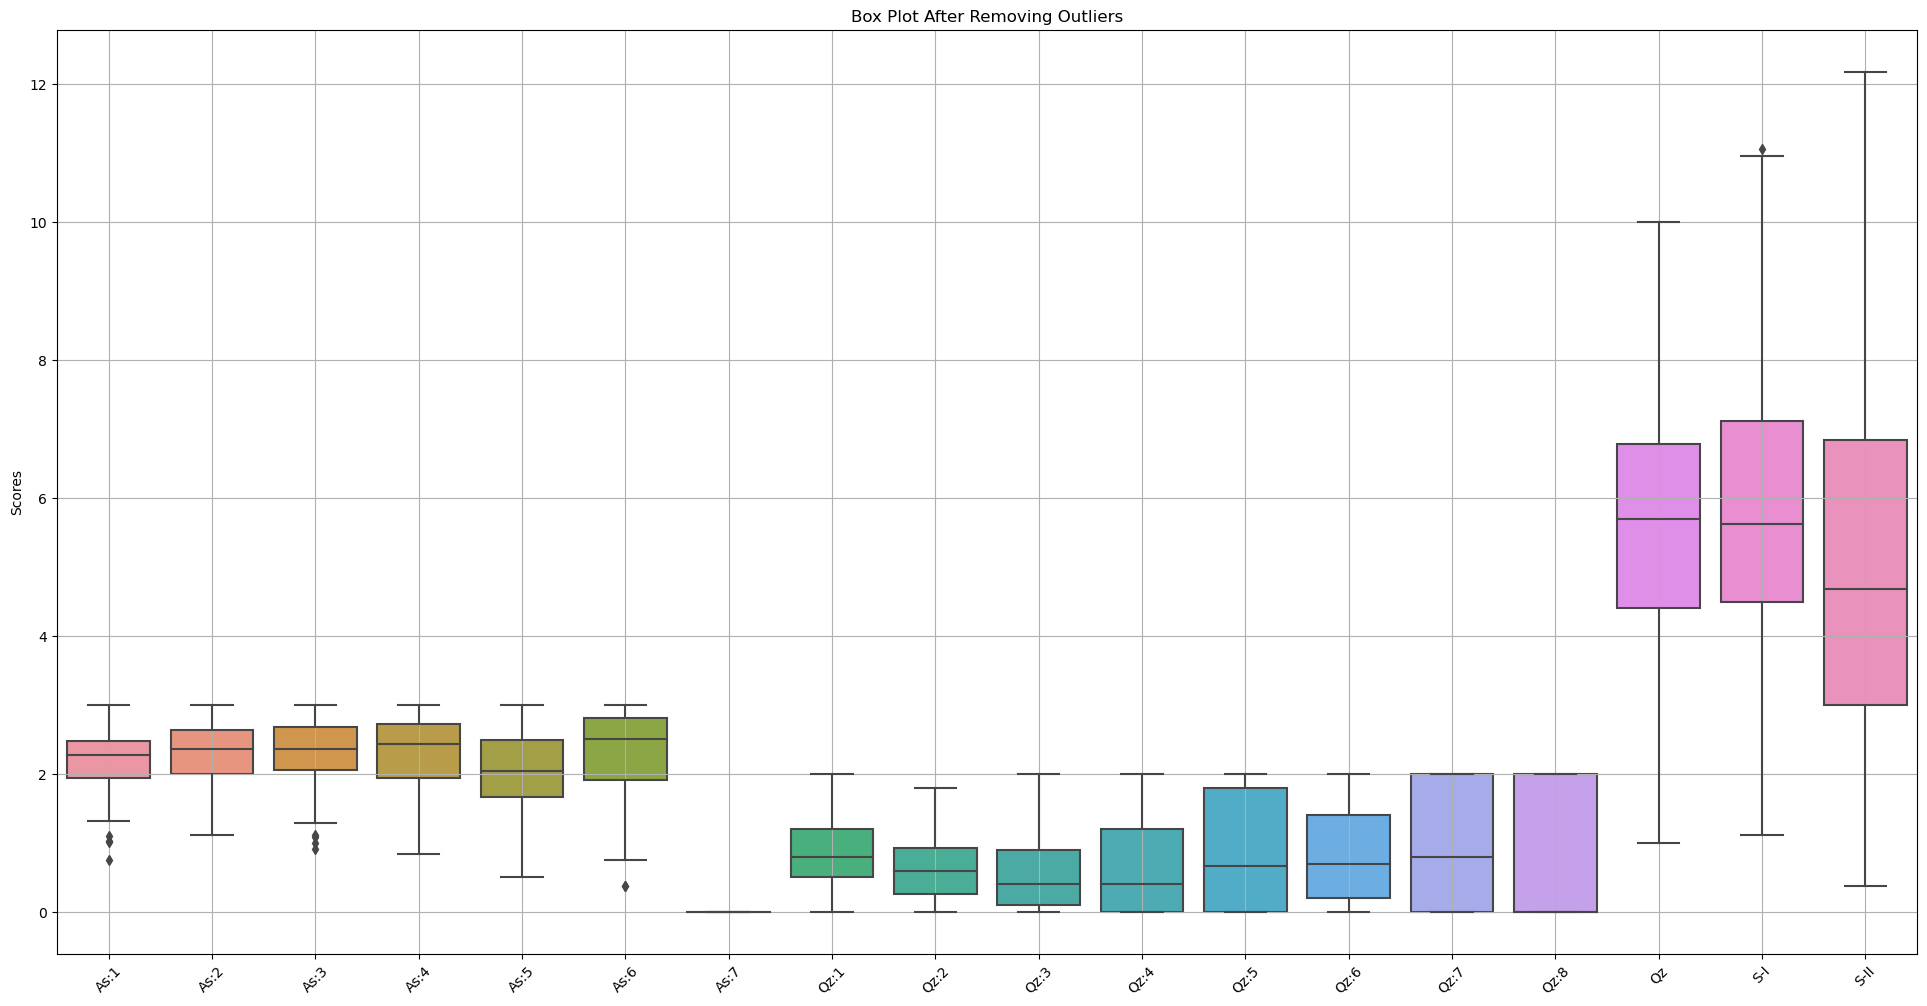

In [15]:

features = [
    'As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'As:7',
    'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'Qz',
    'S-I', 'S-II'
]

cleaned_data = data.copy() 

for feature in features:
    Q1 = cleaned_data[feature].quantile(0.25)
    Q3 = cleaned_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[feature] >= lower_bound) & (cleaned_data[feature] <= upper_bound)]

# Now, plotting the box plot for the cleaned data
plt.figure(figsize=(24, 12))  
sns.boxplot(data=cleaned_data[features])
plt.xticks(rotation=45) 
plt.title('Box Plot After Removing Outliers')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


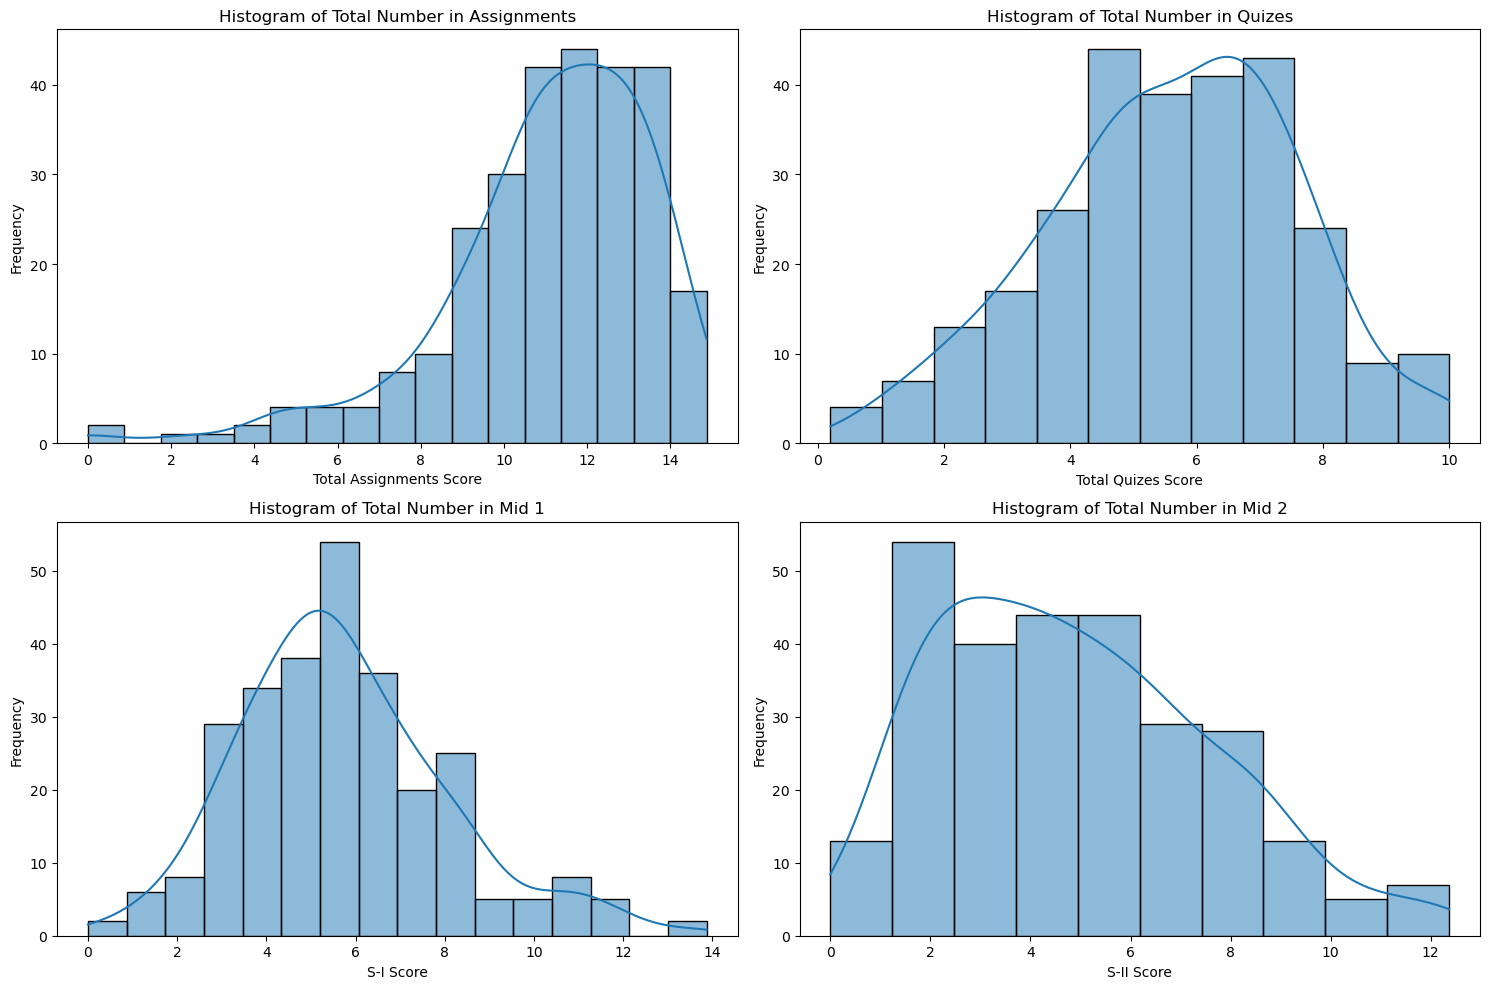

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms for each attribute
sns.histplot(data=data, x="As", kde=True, ax=axes[0, 0])
sns.histplot(data=data, x="Qz", kde=True, ax=axes[0, 1])
sns.histplot(data=data, x="S-I", kde=True, ax=axes[1, 0])
sns.histplot(data=data, x="S-II", kde=True, ax=axes[1, 1])

# Set titles and labels
axes[0, 0].set_title('Histogram of Total Number in Assignments')
axes[0, 0].set_xlabel('Total Assignments Score')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].set_title('Histogram of Total Number in Quizes')
axes[0, 1].set_xlabel('Total Quizes Score')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].set_title('Histogram of Total Number in Mid 1')
axes[1, 0].set_xlabel('S-I Score')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].set_title('Histogram of Total Number in Mid 2')
axes[1, 1].set_xlabel('S-II Score')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


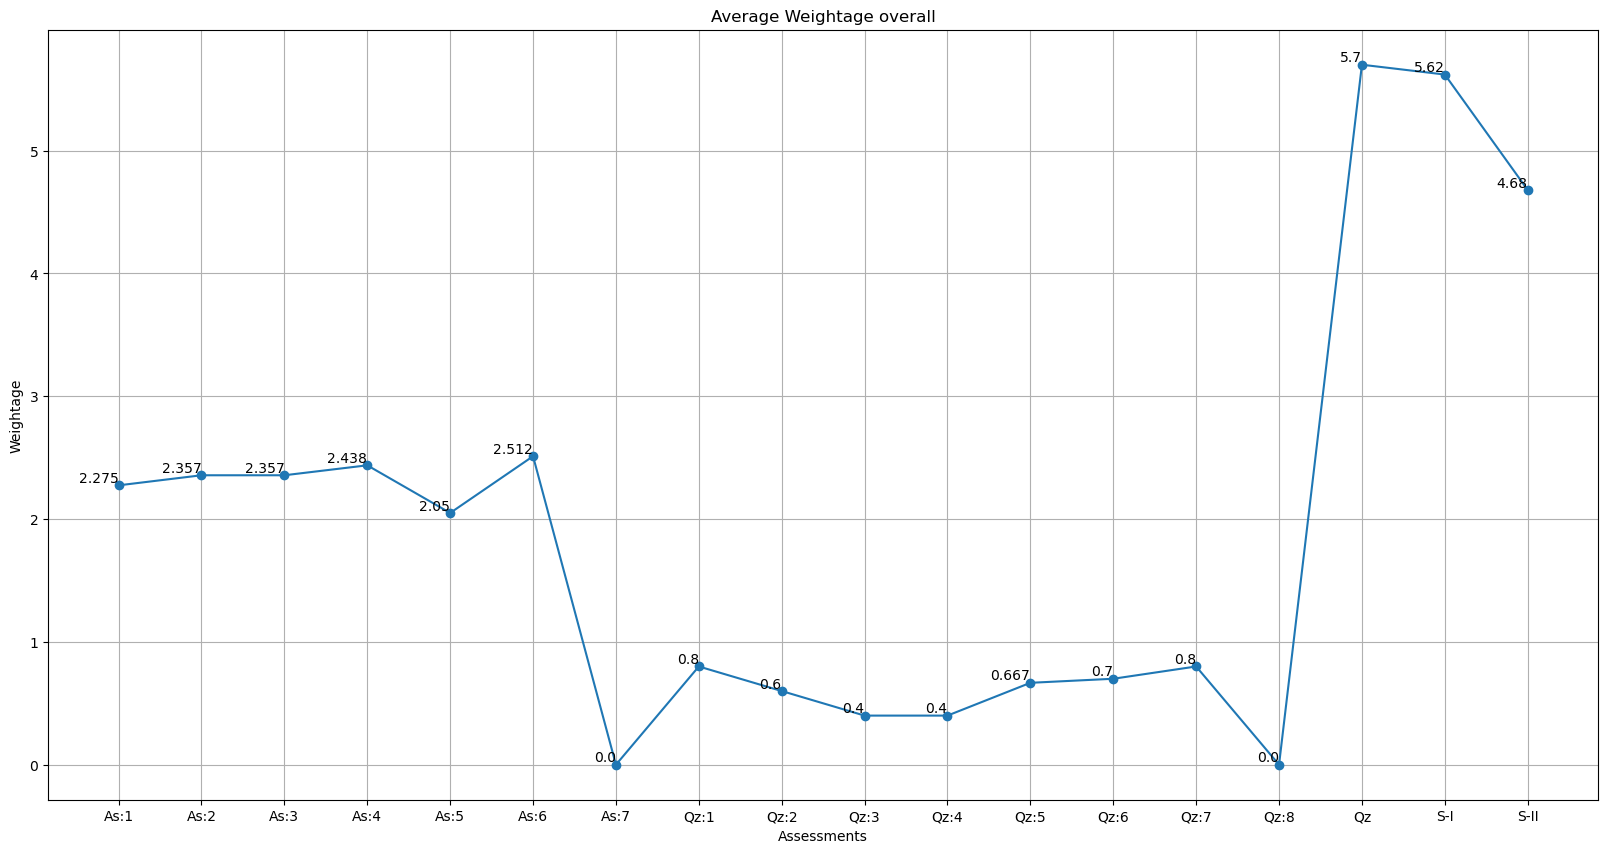

In [17]:
import matplotlib.pyplot as plt

# Calculate median values
median_values = cleaned_data[features].median()

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(median_values.index, median_values.values, marker='o', linestyle='-')
plt.title('Average Weightage overall')
plt.xlabel('Assessments')
plt.ylabel('Weightage')
plt.xticks(rotation=0)  
plt.grid(True)


for i, value in enumerate(median_values.values):
    plt.text(median_values.index[i], value, f'{value}', ha='right', va='bottom')

plt.show()


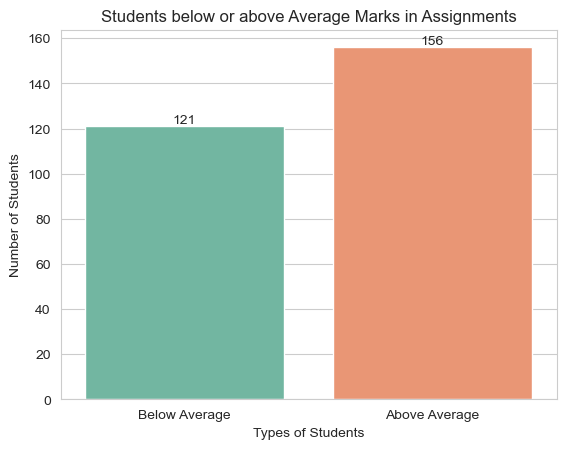

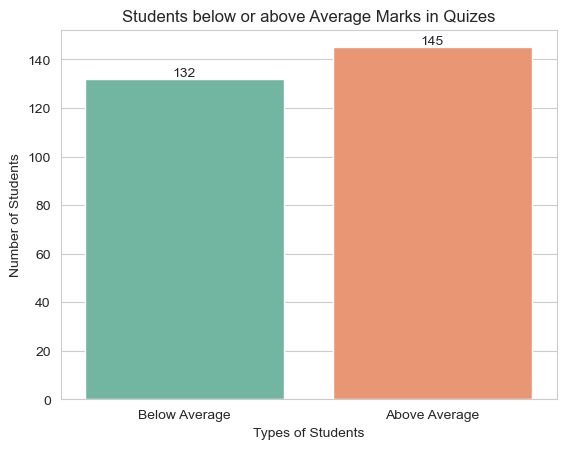

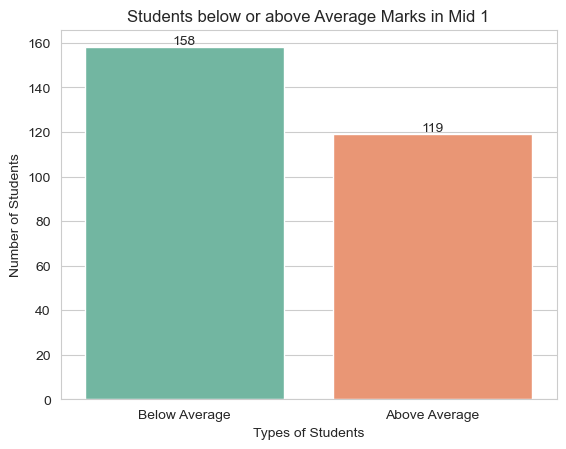

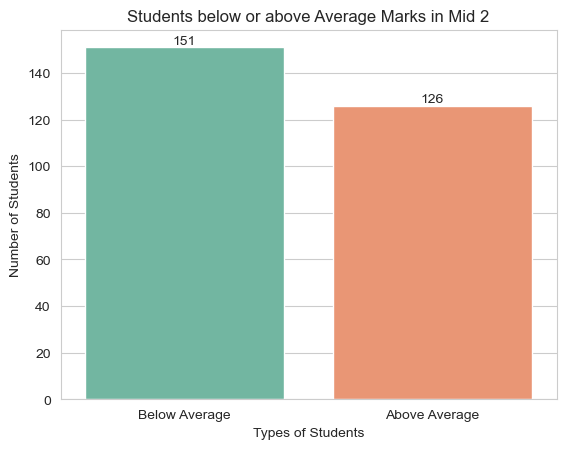

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set_style("whitegrid")

# Function to plot bar plots
def plot_barplot(data, column, title):
    mean_value = data[column].mean()

    # Count the number of samples below and above the mean
    below_mean = data[data[column] < mean_value].shape[0]
    above_mean = data[data[column] >= mean_value].shape[0]

    # Plot the graph
    sns.barplot(x=['Below Average', 'Above Average'], y=[below_mean, above_mean], palette="Set2")
    plt.xlabel('Types of Students')
    plt.ylabel('Number of Students')
    plt.title(title)

    # Annotate bars with counts
    plt.text(0, below_mean, str(below_mean), ha='center', va='bottom')
    plt.text(1, above_mean, str(above_mean), ha='center', va='bottom')

    plt.show()

# Plotting for 'As'
plot_barplot(data, 'As', 'Students below or above Average Marks in Assignments')

# Plotting for 'Qz'
plot_barplot(data, 'Qz', 'Students below or above Average Marks in Quizes')

# Plotting for 'S-I'
plot_barplot(data, 'S-I', 'Students below or above Average Marks in Mid 1')

plot_barplot(data, 'S-II', 'Students below or above Average Marks in Mid 2')


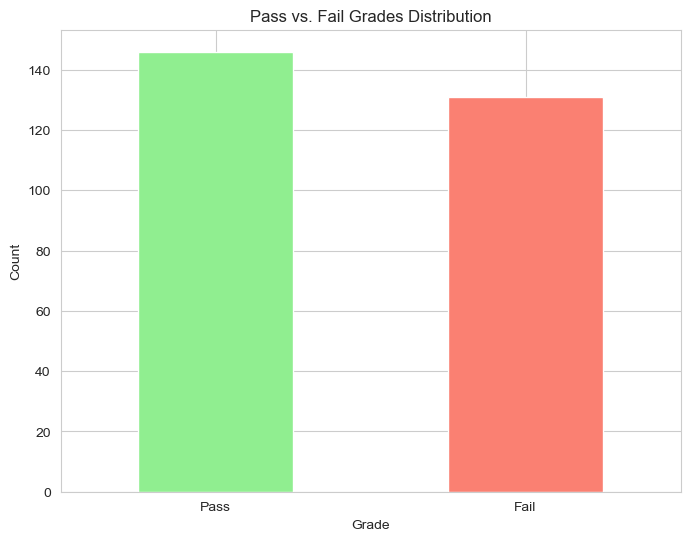

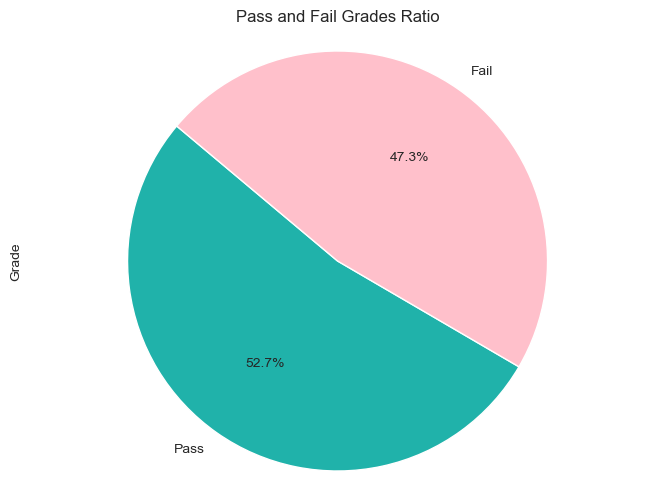

In [19]:
data["Grade"].value_counts()

# data["Grade"]
grade_counts = data["Grade"].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Pass vs. Fail Grades Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



# Assuming grade_counts contains the count of "Pass" and "Fail" grades
grade_counts = data["Grade"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightseagreen', 'pink'], startangle=140)
plt.title('Pass and Fail Grades Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


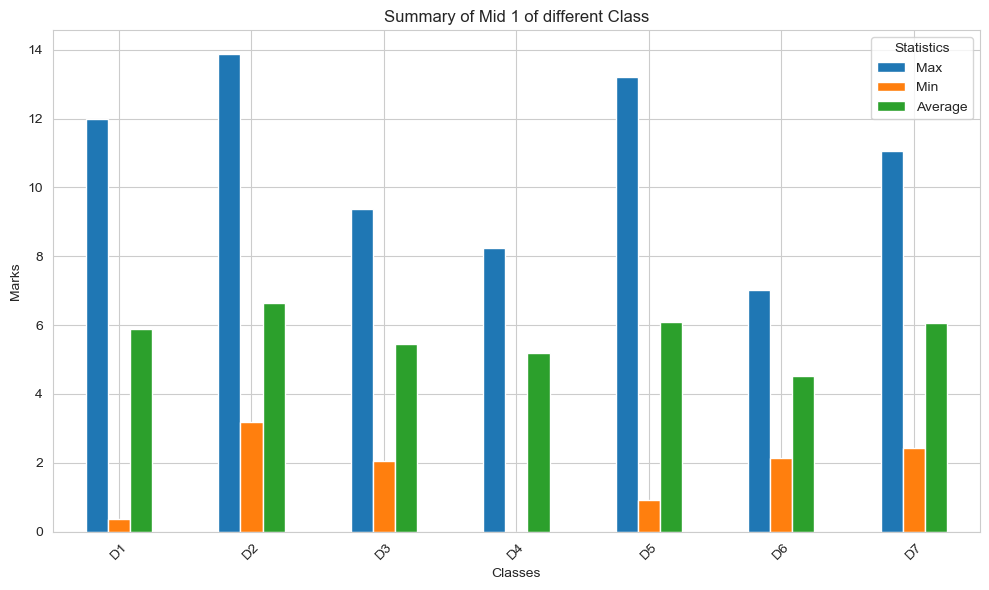

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate statistics
max_mid1 = data.groupby(['Sheet'])['S-I'].max()
min_mid1 = data.groupby(['Sheet'])['S-I'].min()
avg_mid1 = data.groupby(['Sheet'])['S-I'].mean()
# Create a DataFrame from the aggregated values
summary_data = pd.DataFrame({
    'Max': max_mid1,
    'Min': min_mid1,
    'Average': avg_mid1
})

# Plotting
summary_data.plot(kind='bar', figsize=(10, 6))
plt.title('Summary of Mid 1 of different Class')
plt.xlabel('Classes')
plt.ylabel('Marks')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.tight_layout()
plt.show()


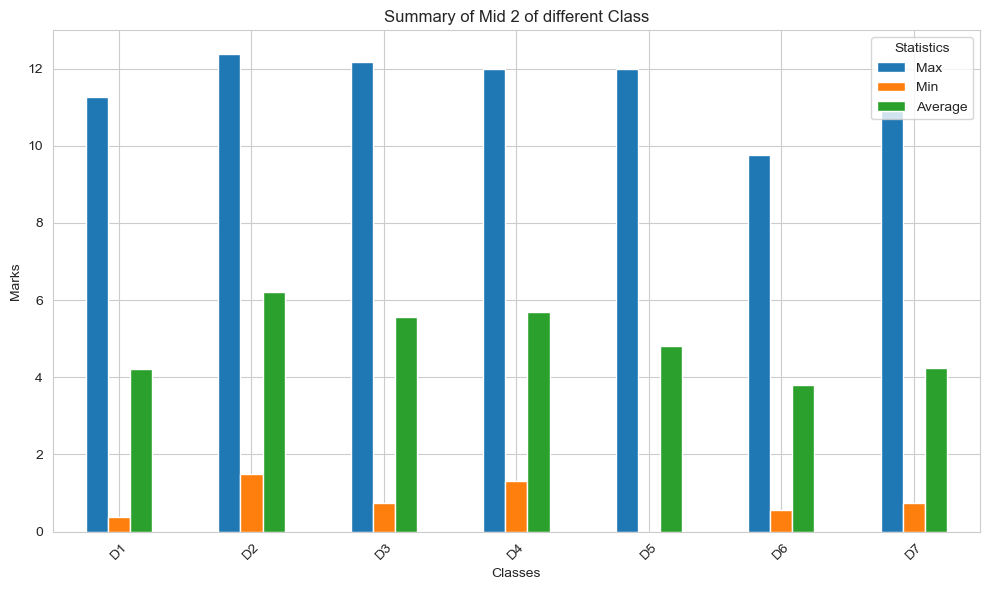

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate statistics
max_mid1 = data.groupby(['Sheet'])['S-II'].max()
min_mid1 = data.groupby(['Sheet'])['S-II'].min()
avg_mid1 = data.groupby(['Sheet'])['S-II'].mean()
# Create a DataFrame from the aggregated values
summary_data = pd.DataFrame({
    'Max': max_mid1,
    'Min': min_mid1,
    'Average': avg_mid1
})

# Plotting
summary_data.plot(kind='bar', figsize=(10, 6))
plt.title('Summary of Mid 2 of different Class')
plt.xlabel('Classes')
plt.ylabel('Marks')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.tight_layout()
plt.show()


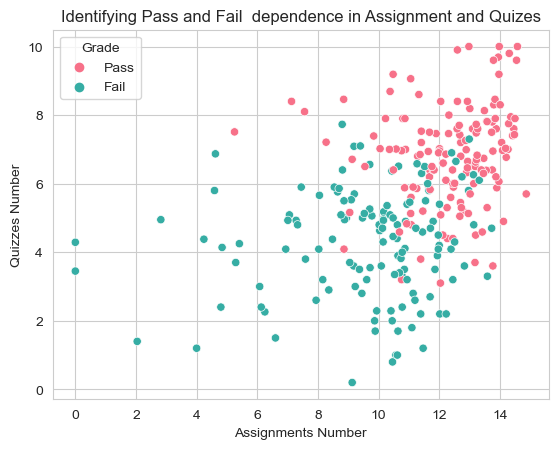

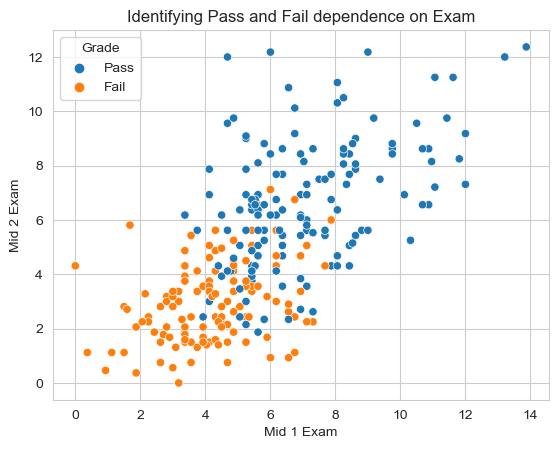

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = sns.color_palette("husl", 2)  

sns.scatterplot(data=data, x='As', y='Qz', hue='Grade', palette=custom_palette)

plt.xlabel('Assignments Number')
plt.ylabel('Quizzes Number')
plt.title('Identifying Pass and Fail  dependence in Assignment and Quizes')

plt.show()

sns.scatterplot(data=data, x='S-I', y='S-II', hue='Grade', palette="tab10")
plt.xlabel('Mid 1 Exam')
plt.ylabel('Mid 2 Exam')
plt.title('Identifying Pass and Fail dependence on Exam')

plt.show()

# Decision Tree 


## Prediction before Mid 2


In [23]:
# Import Basic Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [24]:
# convert the Fail and Pass into 0 and 1 

data_copy = data.copy()
grades_series = data_copy["Grade"]
data_copy["Grade"] = grades_series.map({"Pass": 1, "Fail": 0})
data_copy["Grade"].values

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [25]:
data_copy

,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Qz:6,Qz:7,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade
1,1.975,2.700,2.571,3.000,2.125,2.812,1.5,0.900,0.9,0.0,...,1.0,0.000,D1,0.0,0.0,13.20,4.50,9.75,8.62,1
2,2.000,1.860,1.993,1.219,1.875,2.850,0.3,0.000,0.1,0.0,...,0.4,0.000,D1,0.0,0.0,10.57,1.00,3.37,3.93,0
3,2.125,1.890,2.571,2.325,1.625,1.875,0.0,0.000,0.2,0.0,...,0.0,2.000,D1,0.0,0.0,10.78,2.40,6.56,0.93,0
4,1.025,1.260,1.286,2.625,1.750,0.375,0.2,0.400,0.0,0.0,...,0.0,2.000,D1,0.0,0.0,7.94,2.60,5.06,2.81,0
5,2.150,1.950,2.679,0.375,2.750,0.938,0.6,0.200,0.0,0.0,...,0.0,0.000,D1,0.0,0.0,10.46,0.80,4.50,2.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2.331,2.121,0.000,2.850,2.200,1.533,1.2,1.133,0.1,0.0,...,0.8,0.333,D7,2.0,0.0,11.03,5.46,6.56,2.90,0
274,1.431,0.000,1.900,1.800,2.175,2.233,0.0,1.333,0.0,0.2,...,0.0,1.000,D7,2.0,0.0,9.53,5.13,3.37,1.59,0
275,1.938,2.186,1.483,1.680,2.000,1.600,0.8,0.933,0.2,0.0,...,1.2,1.167,D7,2.0,0.0,9.40,7.10,5.25,1.50,0
276,2.885,2.571,2.800,2.430,2.750,2.867,1.8,0.800,0.0,0.0,...,1.0,0.333,D7,2.0,0.0,13.87,6.20,8.06,4.31,1


In [26]:
# change the datatype of Grade to numpy  
y = data_copy["Grade"].values
X = data[['As:1', 'As:2', 'As:3', 'As:4','Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']].copy()

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train a decision tree model
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [27]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [29]:
# to show the probabilty of a tree if the tree does not have the stopping criteria
clf.predict_proba(X_test) 

array([[0.92307692, 0.07692308],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.92307692, 0.07692308],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.01785714, 0.98214286],
       [0.92857143, 0.07142857],
       [0.92307692, 0.07692308],
       [0.21428571, 0.78571429],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.92857143, 0.07142857],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.33333333, 0.66666667],
       [0.25      , 0.75      ],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.01785714, 0.98214286],
       [0.01785714, 0.98214286],
       [0.01785714, 0.98214286],
       [0.92307692, 0.07692308],
       [0.92857143, 0.07142857],
       [0.01785714, 0.98214286],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.25      , 0.75      ],
       [0.25      , 0.75      ],
       [0.33333333, 0.66666667],
       [0.

In [30]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions,target_names=['Pass','Fail']))


accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

sensitivity = recall_score(y_test, predictions)
print("Sensitivity:", sensitivity)

specificity = recall_score(y_test, predictions, pos_label=0)
print("Specificity:", specificity)

precision= precision_score(y_test,predictions)
print("Precision:", precision)

recall=recall_score(y_test,predictions)
print("Recall:", recall)
print()
print("Confusion Matrix:")
confusion_matrix(y_test,predictions,labels =[0,1])

              precision    recall  f1-score   support

        Pass       0.82      0.75      0.79        44
        Fail       0.79      0.85      0.82        48

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92

Accuracy: 0.8043478260869565
Sensitivity: 0.8541666666666666
Specificity: 0.75
Precision: 0.7884615384615384
Recall: 0.8541666666666666

Confusion Matrix:


array([[33, 11],
       [ 7, 41]], dtype=int64)

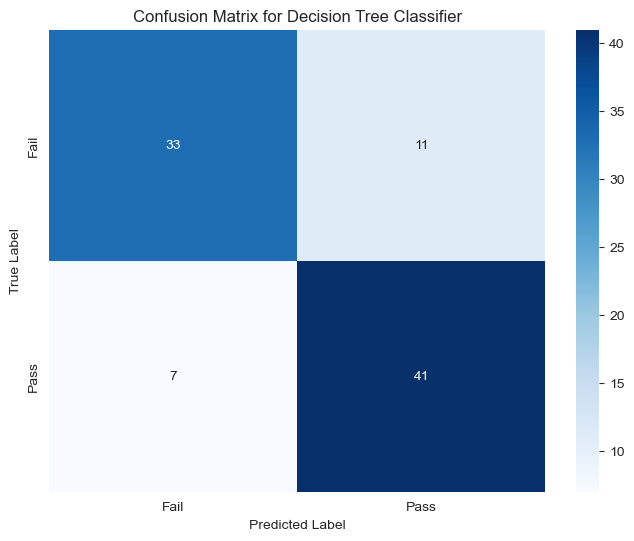

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels by the decision tree classifier
# If you haven't split your data, you can use the entire dataset for this example

# Train the decision tree classifier (assuming 'clf' is your trained classifier)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [32]:
new_data_features_mid2 = data_copy[['As:1', 'As:2', 'As:3', 'As:4',
                                    'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4','S-I']].copy()

predictions_mid2 = clf.predict(new_data_features_mid2)
data_copy['Predicted_Grade_Mid'] = predictions_mid2
data_copy['Predicted_Grade_Mid'] = data_copy['Predicted_Grade_Mid'].map({0: 'Fail', 1: 'Pass'})
data_copy

,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Qz:7,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade,Predicted_Grade_Mid
1,1.975,2.700,2.571,3.000,2.125,2.812,1.5,0.900,0.9,0.0,...,0.000,D1,0.0,0.0,13.20,4.50,9.75,8.62,1,Pass
2,2.000,1.860,1.993,1.219,1.875,2.850,0.3,0.000,0.1,0.0,...,0.000,D1,0.0,0.0,10.57,1.00,3.37,3.93,0,Fail
3,2.125,1.890,2.571,2.325,1.625,1.875,0.0,0.000,0.2,0.0,...,2.000,D1,0.0,0.0,10.78,2.40,6.56,0.93,0,Fail
4,1.025,1.260,1.286,2.625,1.750,0.375,0.2,0.400,0.0,0.0,...,2.000,D1,0.0,0.0,7.94,2.60,5.06,2.81,0,Fail
5,2.150,1.950,2.679,0.375,2.750,0.938,0.6,0.200,0.0,0.0,...,0.000,D1,0.0,0.0,10.46,0.80,4.50,2.25,0,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2.331,2.121,0.000,2.850,2.200,1.533,1.2,1.133,0.1,0.0,...,0.333,D7,2.0,0.0,11.03,5.46,6.56,2.90,0,Fail
274,1.431,0.000,1.900,1.800,2.175,2.233,0.0,1.333,0.0,0.2,...,1.000,D7,2.0,0.0,9.53,5.13,3.37,1.59,0,Fail
275,1.938,2.186,1.483,1.680,2.000,1.600,0.8,0.933,0.2,0.0,...,1.167,D7,2.0,0.0,9.40,7.10,5.25,1.50,0,Fail
276,2.885,2.571,2.800,2.430,2.750,2.867,1.8,0.800,0.0,0.0,...,0.333,D7,2.0,0.0,13.87,6.20,8.06,4.31,1,Pass


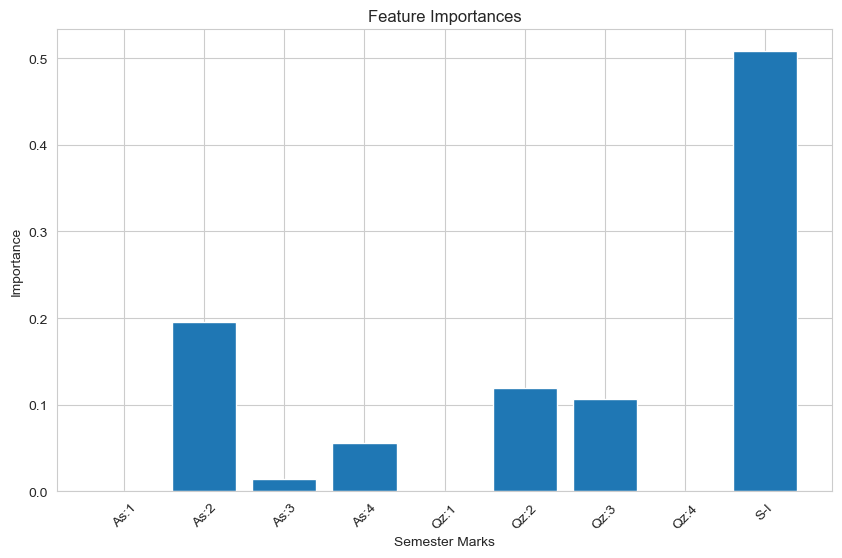

In [33]:
importances = clf.feature_importances_
evaluations = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(evaluations, importances)
plt.xlabel('Semester Marks')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [34]:
Number_importance= pd.DataFrame(clf.feature_importances_, index= evaluations,columns = ["Importance"])
Number_importance = Number_importance.sort_values(by="Importance", ascending=False)
Number_importance

,Importance
S-I,0.507675
As:2,0.195163
Qz:2,0.119651
Qz:3,0.107264
As:4,0.056056
As:3,0.014190
As:1,0.000000
Qz:1,0.000000
Qz:4,0.000000


<Axes: >

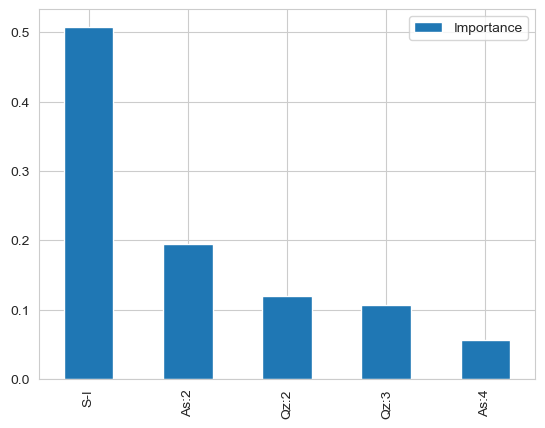

In [35]:
Number_importance.head(5).plot(kind="bar")

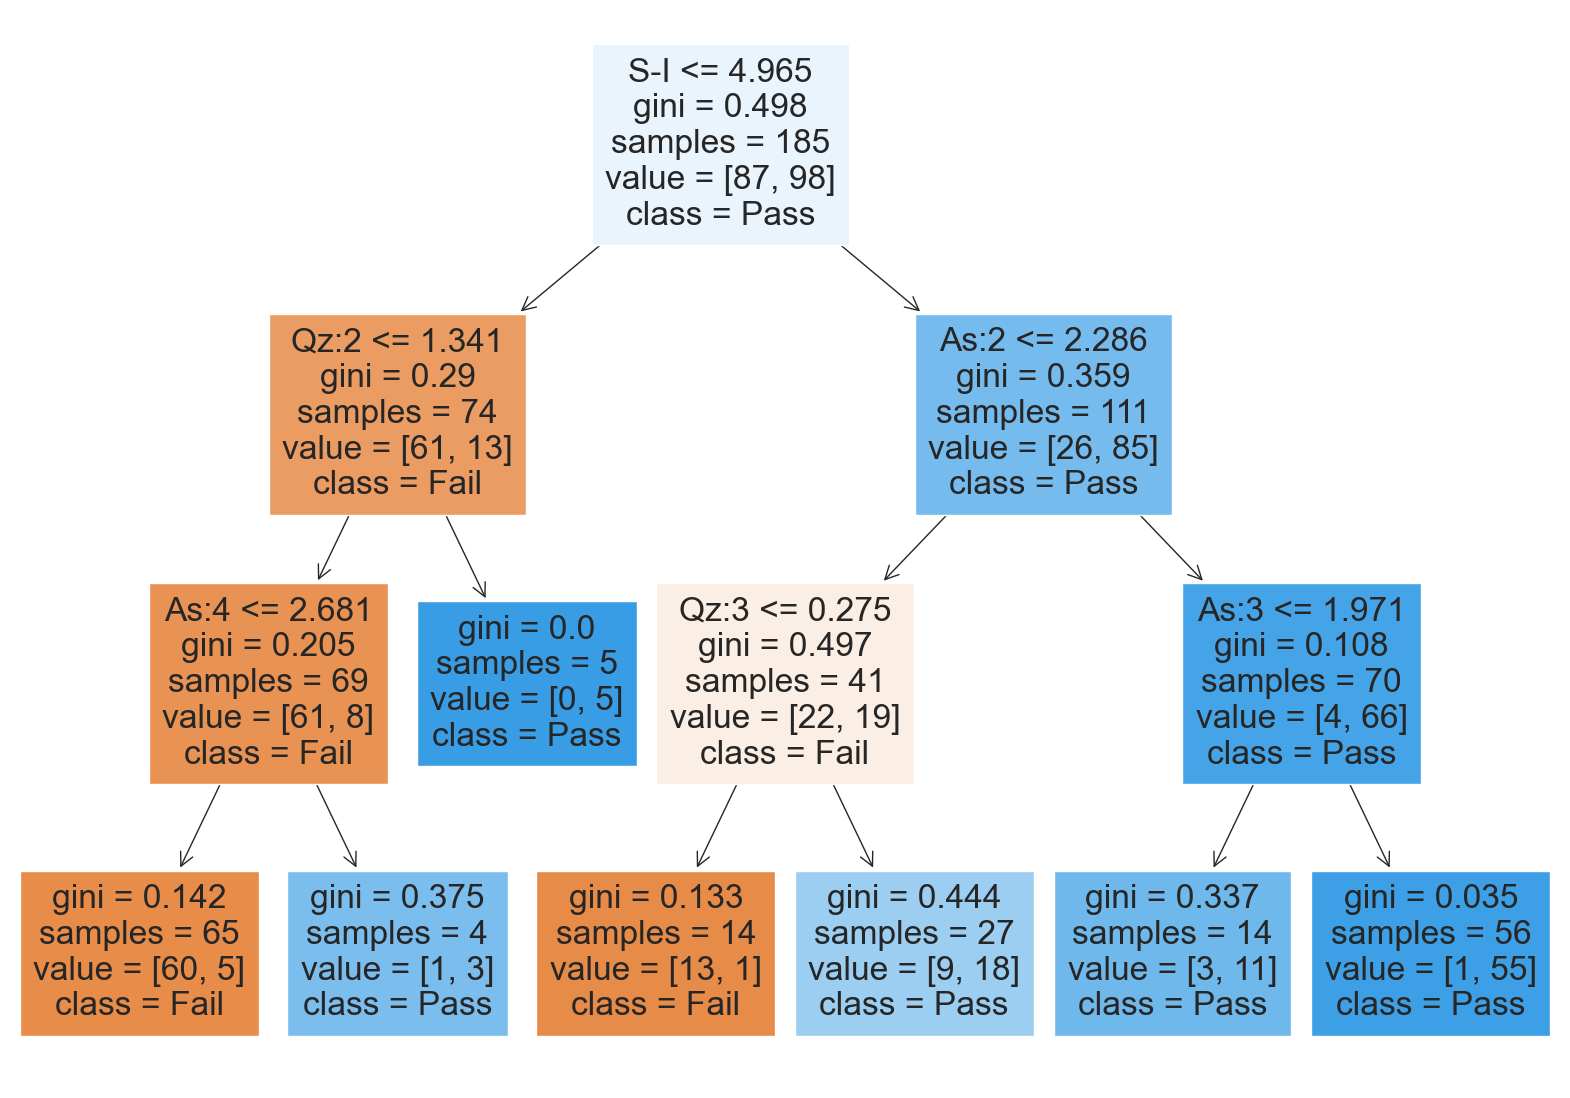

In [36]:
from sklearn.tree import plot_tree
feature_names_list = list(X.columns)
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=feature_names_list, class_names=["Fail", "Pass"], filled=True)
plt.show()


Accuracy: 0.7717391304347826


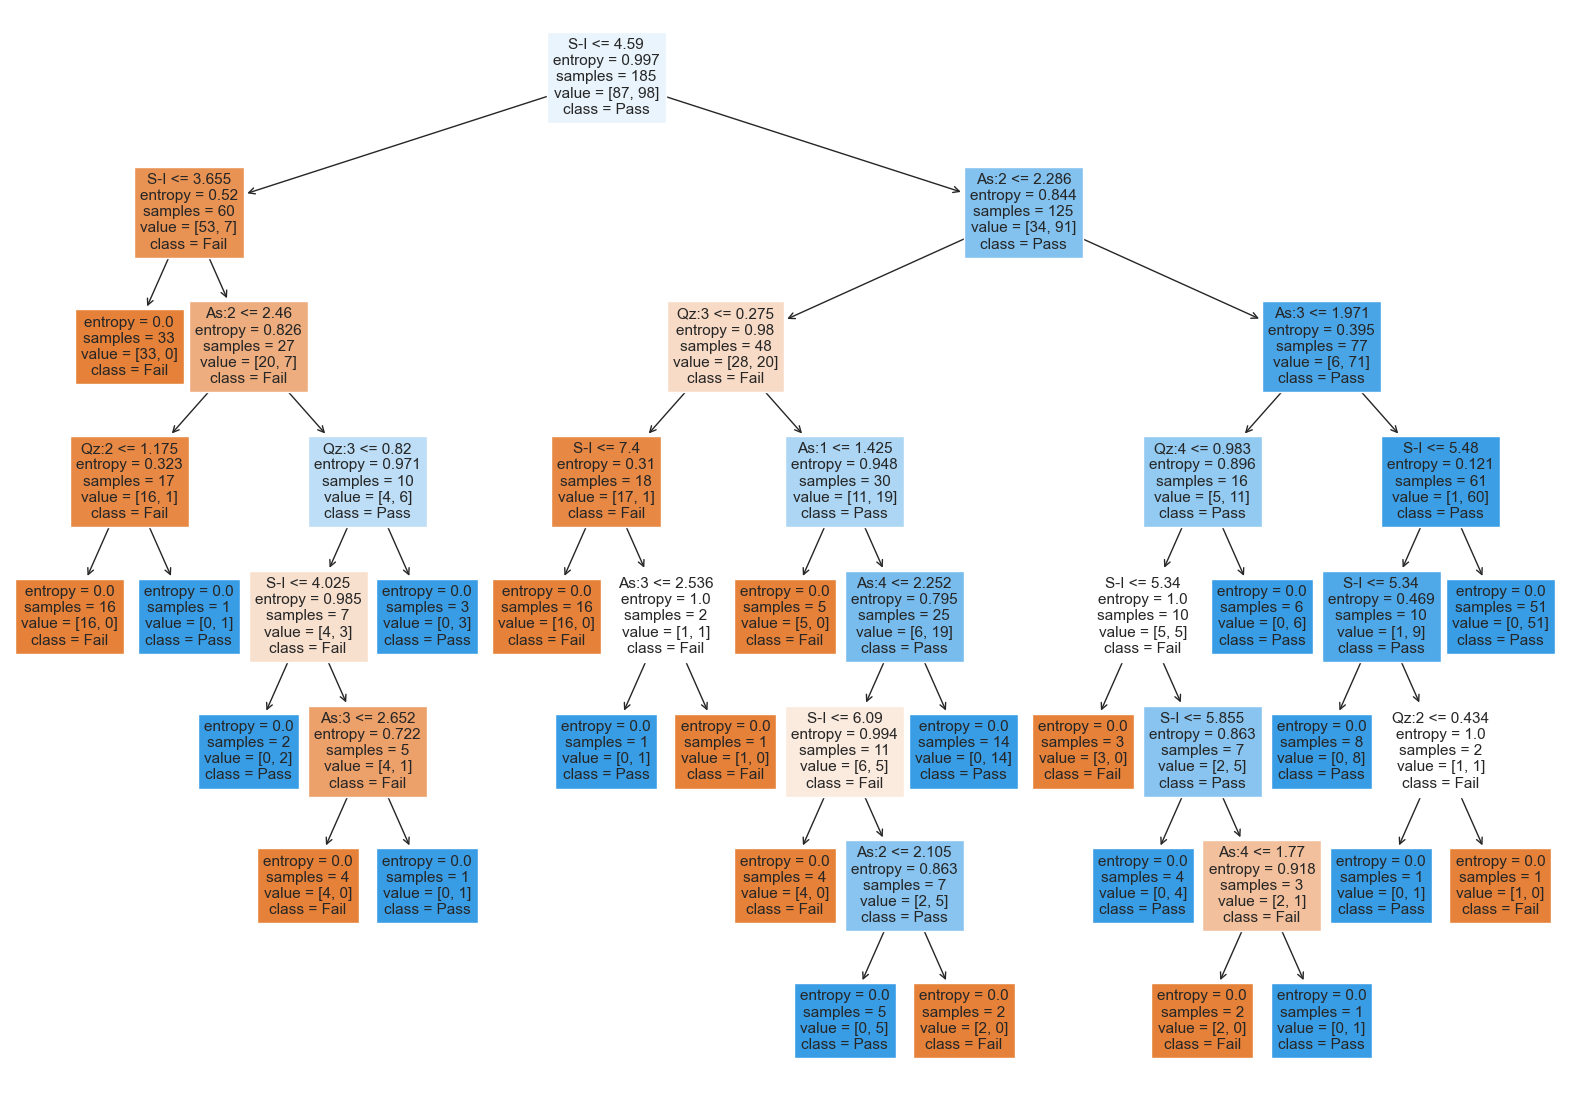

In [37]:
# Remove Impurities By using The Entropy

clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
feature_names_list = list(X.columns)
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=feature_names_list, class_names=["Fail", "Pass"], filled=True)
plt.show()


Accuracy: 0.75


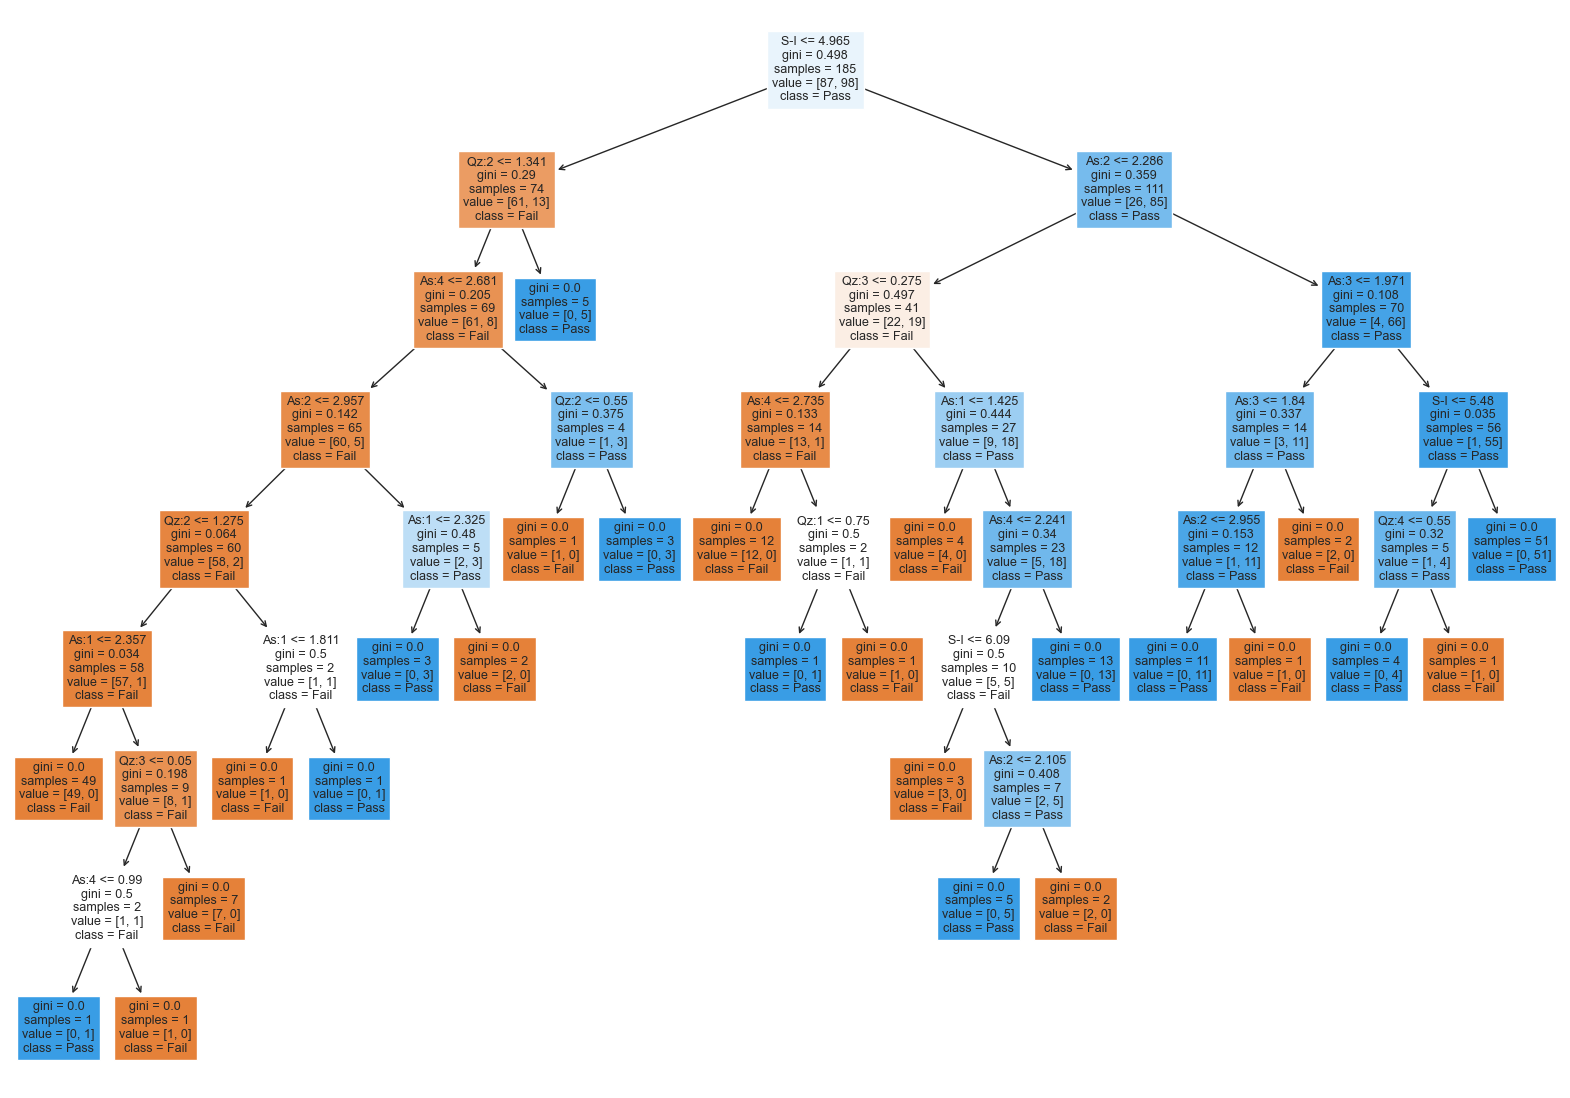

In [38]:
# Remove Impurities By using The Gini Indexing

clf = DecisionTreeClassifier(criterion="gini", max_depth=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
feature_names_list = list(X.columns)
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=feature_names_list, class_names=["Fail", "Pass"], filled=True)
plt.show()


# Prediction for Final Exam
this prdiction is after the student has compeleted all the assessment , quizes and mid exams. Depending upon these we have to predict if he is pass or fail after final Exam

In [39]:
# Import Basic Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [40]:

X = data[['Qz','As', 'S-I','S-II']].copy()

y = data_copy["Grade"].values

# Step 2: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Step 3: Train a decision tree model
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [41]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [42]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0], dtype=int64)

In [43]:
clf.predict_proba(X_test)

array([[0.3125    , 0.6875    ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.3125    , 0.6875    ],
       [0.1       , 0.9       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88888889, 0.11111111],
       [0.3125    , 0.6875    ],
       [0.3125    , 0.6875    ],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.3125    , 0.6875    ],
       [0.        , 1.        ],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.3125    , 0.6875    ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [44]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions,target_names=['Pass','Fail']))


accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

sensitivity = recall_score(y_test, predictions)
print("Sensitivity:", sensitivity)

specificity = recall_score(y_test, predictions, pos_label=0)
print("Specificity:", specificity)

precision= precision_score(y_test,predictions)
print("Precision:", precision)

recall=recall_score(y_test,predictions)
print("Recall:", recall)

confusion_matrix(y_test,predictions,labels =[0,1])

              precision    recall  f1-score   support

        Pass       0.90      0.80      0.84        44
        Fail       0.83      0.92      0.87        48

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92

Accuracy: 0.8586956521739131
Sensitivity: 0.9166666666666666
Specificity: 0.7954545454545454
Precision: 0.8301886792452831
Recall: 0.9166666666666666


array([[35,  9],
       [ 4, 44]], dtype=int64)

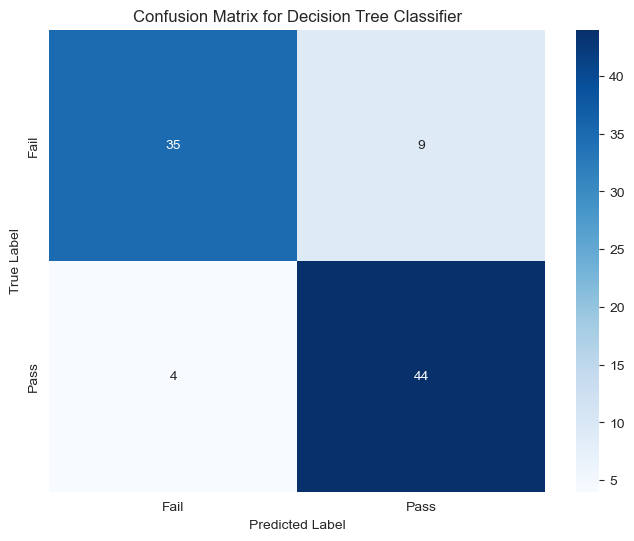

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the decision tree classifier (assuming 'clf' is your trained classifier)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [46]:

new_data_features_mid2 = data_copy[['Qz','As','S-I','S-II']].copy()
predictions_mid2 = clf.predict(new_data_features_mid2)
data_copy['Predicted_Grade_FinalExam'] = predictions_mid2
data_copy['Predicted_Grade_FinalExam'] = data_copy['Predicted_Grade_FinalExam'].map({0: 'Fail', 1: 'Pass'})
data_copy

,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade,Predicted_Grade_Mid,Predicted_Grade_FinalExam
1,1.975,2.700,2.571,3.000,2.125,2.812,1.5,0.900,0.9,0.0,...,D1,0.0,0.0,13.20,4.50,9.75,8.62,1,Pass,Pass
2,2.000,1.860,1.993,1.219,1.875,2.850,0.3,0.000,0.1,0.0,...,D1,0.0,0.0,10.57,1.00,3.37,3.93,0,Fail,Fail
3,2.125,1.890,2.571,2.325,1.625,1.875,0.0,0.000,0.2,0.0,...,D1,0.0,0.0,10.78,2.40,6.56,0.93,0,Fail,Fail
4,1.025,1.260,1.286,2.625,1.750,0.375,0.2,0.400,0.0,0.0,...,D1,0.0,0.0,7.94,2.60,5.06,2.81,0,Fail,Fail
5,2.150,1.950,2.679,0.375,2.750,0.938,0.6,0.200,0.0,0.0,...,D1,0.0,0.0,10.46,0.80,4.50,2.25,0,Fail,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2.331,2.121,0.000,2.850,2.200,1.533,1.2,1.133,0.1,0.0,...,D7,2.0,0.0,11.03,5.46,6.56,2.90,0,Fail,Pass
274,1.431,0.000,1.900,1.800,2.175,2.233,0.0,1.333,0.0,0.2,...,D7,2.0,0.0,9.53,5.13,3.37,1.59,0,Fail,Fail
275,1.938,2.186,1.483,1.680,2.000,1.600,0.8,0.933,0.2,0.0,...,D7,2.0,0.0,9.40,7.10,5.25,1.50,0,Fail,Pass
276,2.885,2.571,2.800,2.430,2.750,2.867,1.8,0.800,0.0,0.0,...,D7,2.0,0.0,13.87,6.20,8.06,4.31,1,Pass,Pass


In [47]:
clf.feature_importances_

array([0.23810409, 0.07868105, 0.60029221, 0.08292265])

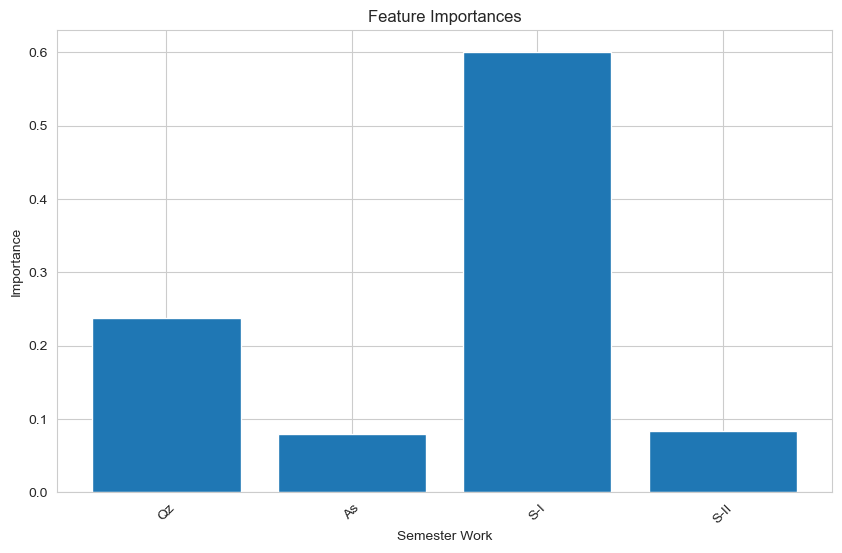

In [48]:
importances = clf.feature_importances_
evaluations = X.columns
plt.figure(figsize=(10, 6))
plt.bar(evaluations, importances)
plt.xlabel('Semester Work')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [49]:
Number_importance= pd.DataFrame(clf.feature_importances_, index= evaluations,columns = ["Importance"])
Number_importance = Number_importance.sort_values(by="Importance", ascending=False)
Number_importance

,Importance
S-I,0.600292
Qz,0.238104
S-II,0.082923
As,0.078681


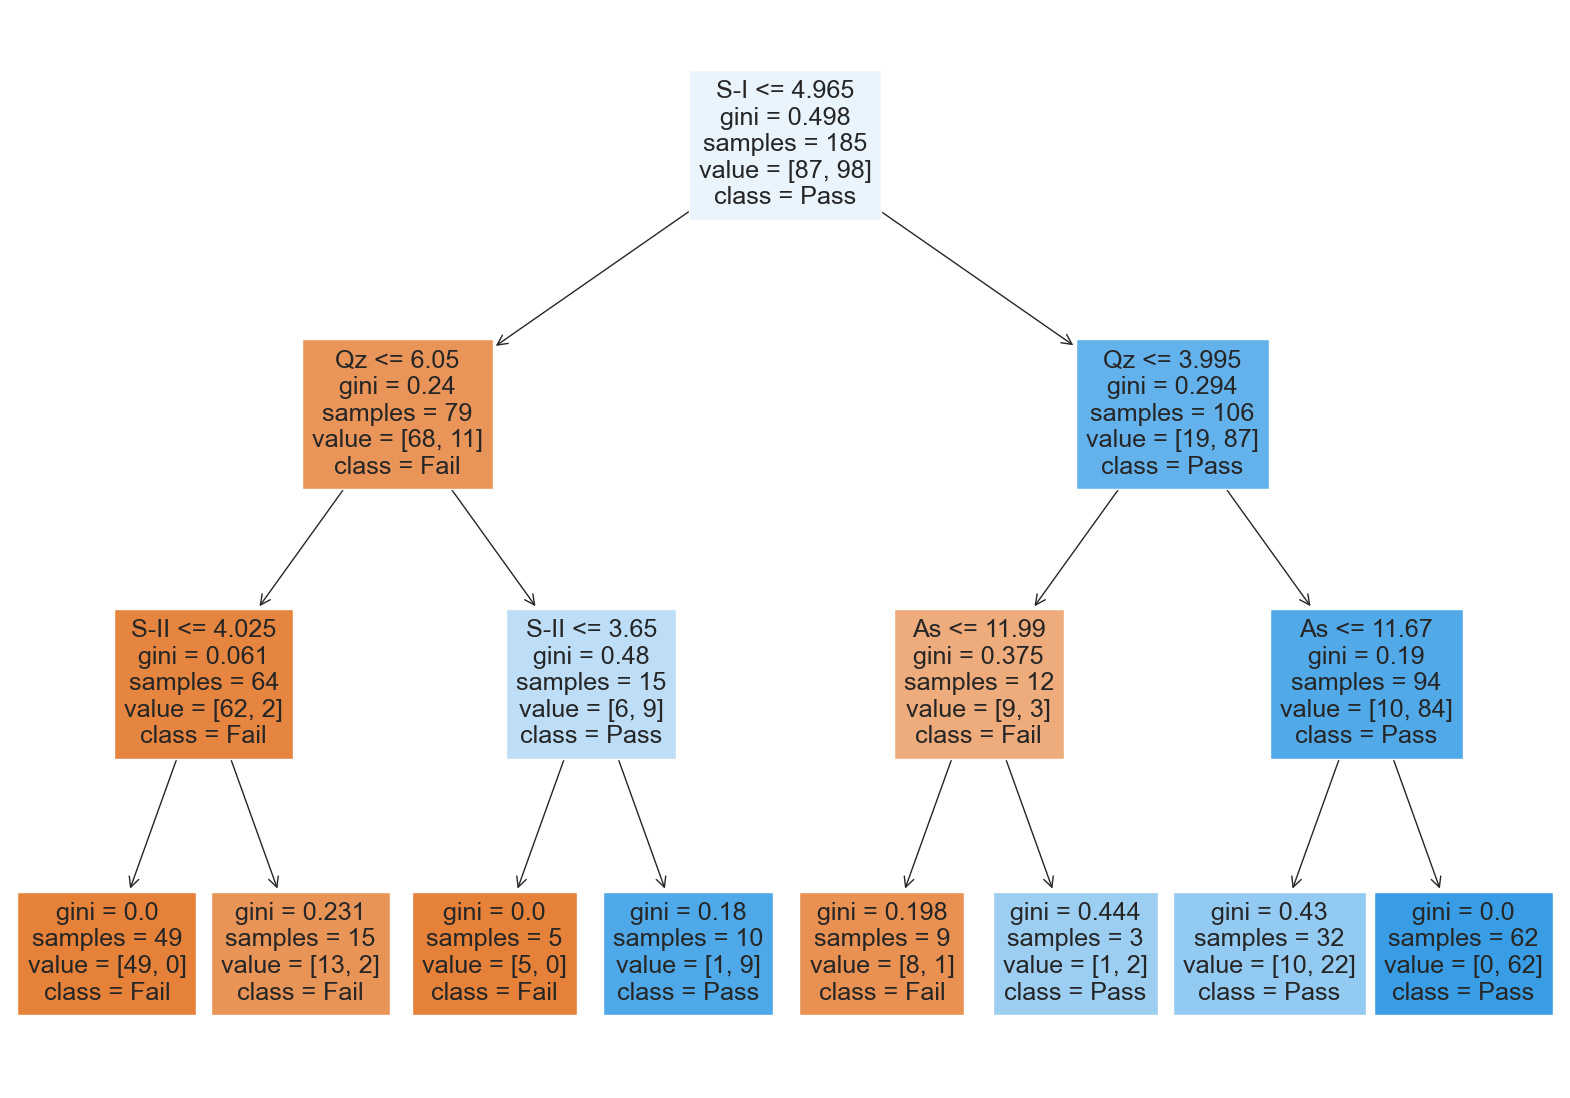

In [50]:
from sklearn.tree import plot_tree

feature_names_list = list(X.columns)
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=feature_names_list, class_names=["Fail", "Pass"], filled=True)
plt.show()


Accuracy: 0.8913043478260869


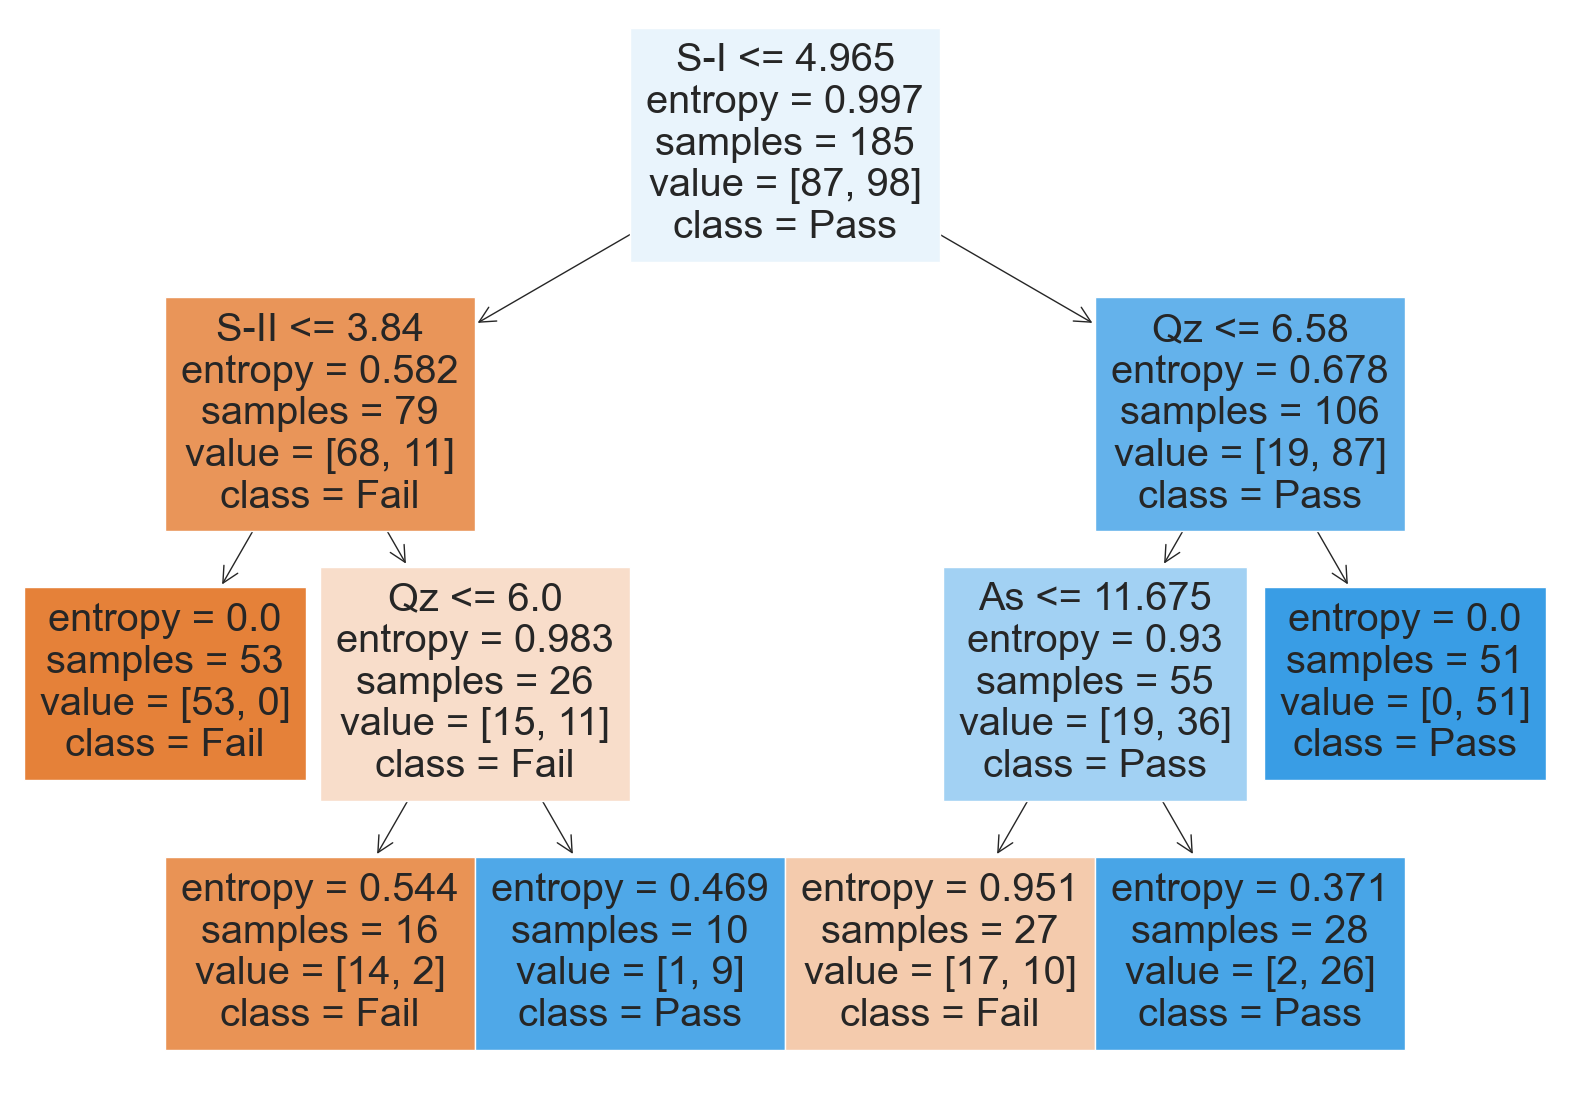

In [51]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

feature_names_list = list(X.columns)
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=feature_names_list, class_names=["Fail", "Pass"], filled=True)
plt.show()


Accuracy: 0.8586956521739131


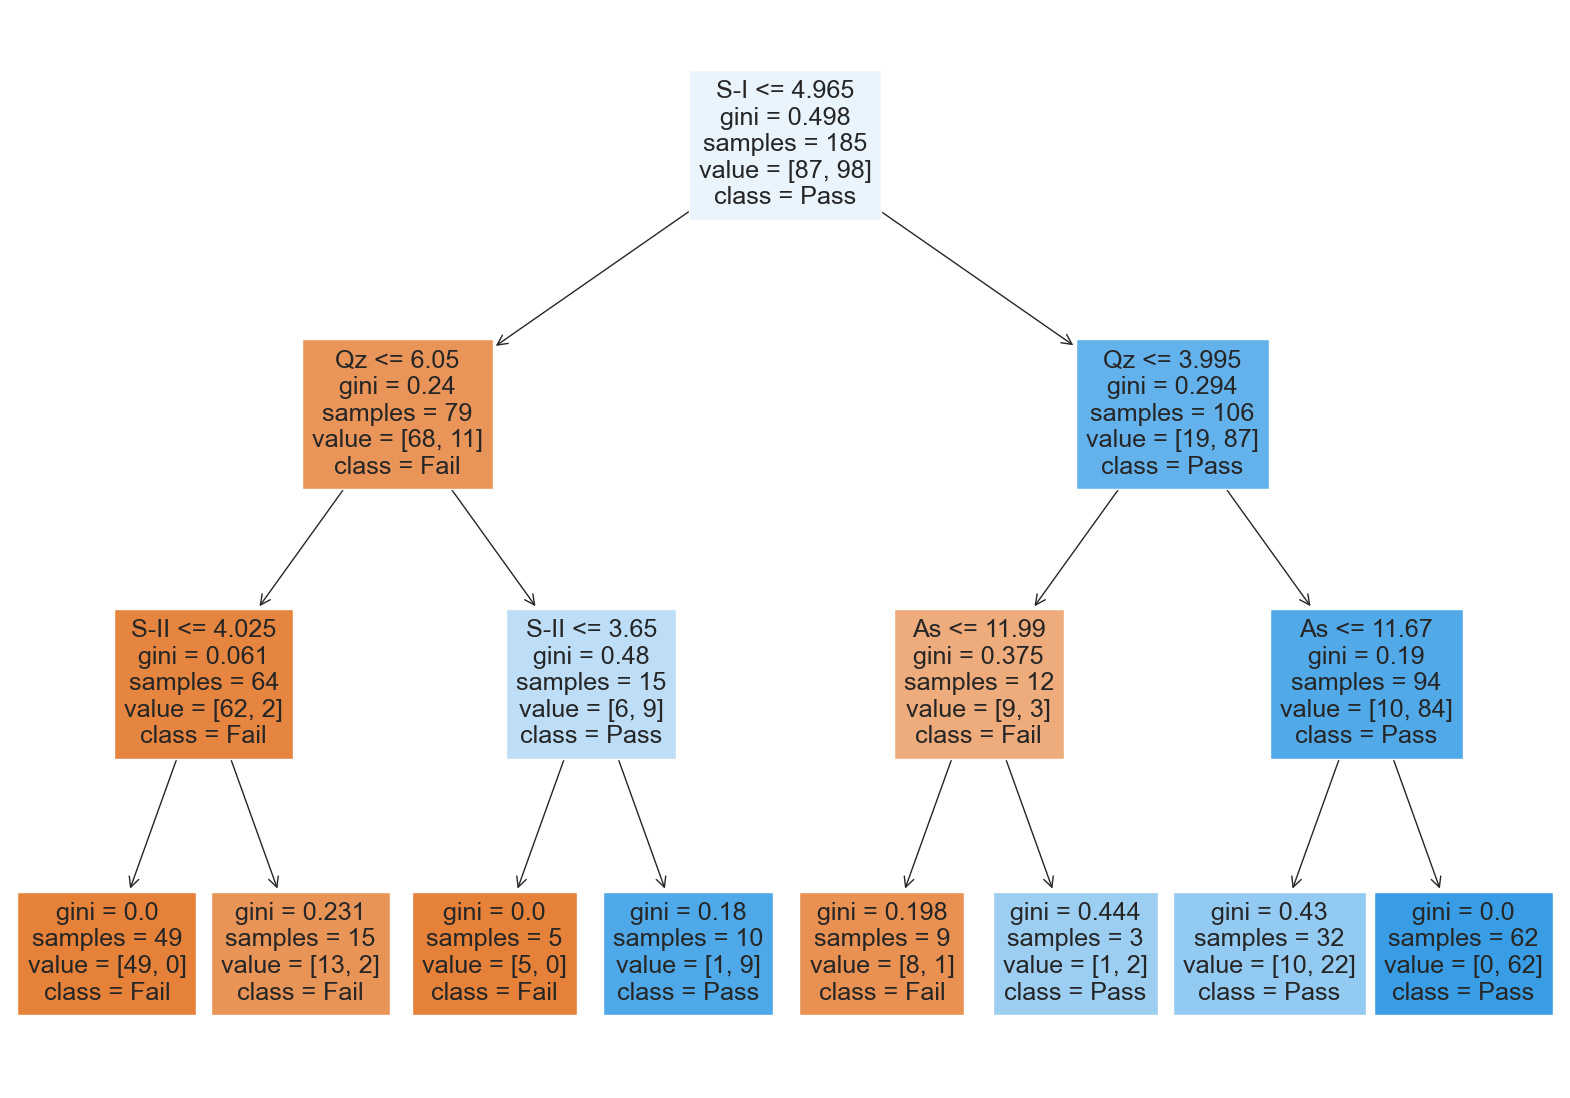

In [52]:

clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))


feature_names_list = list(X.columns)
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=feature_names_list, class_names=["Fail", "Pass"], filled=True)
plt.show()

# Nearest Neighbors


## Before Mid 2

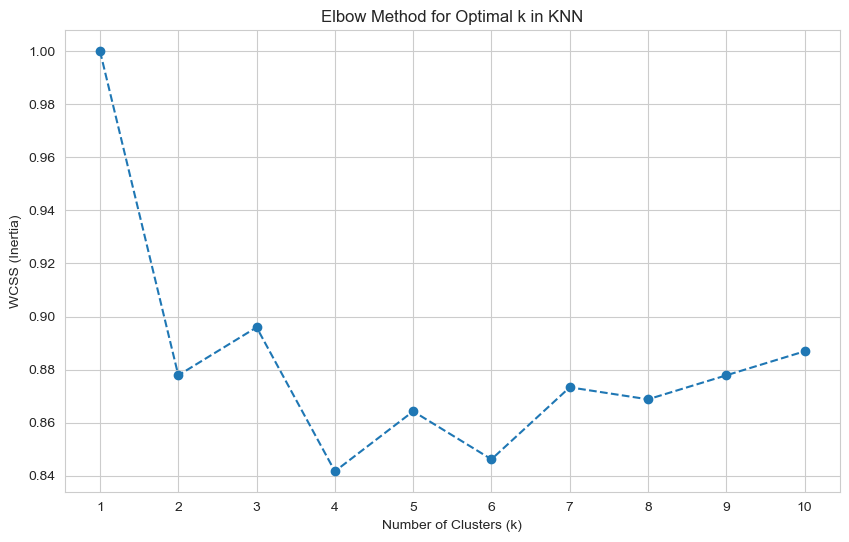

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Step 1: Prepare your data
X = data_copy[['As:1', 'As:2', 'As:3', 'As:4','Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']].copy().values  
y = data_copy["Grade"].values

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create empty lists to store inertia (WCSS) and accuracies
inertia_values = []
accuracy_values = []

# Iterate over a range of k values (number of clusters)
for k in range(1, 11):  # Adjust the range as needed
    # Create KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

    # Calculate inertia (WCSS)
    inertia = knn_classifier.score(X_train, y_train)  # You may need to use a different metric here
    inertia_values.append(inertia)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k in KNN')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


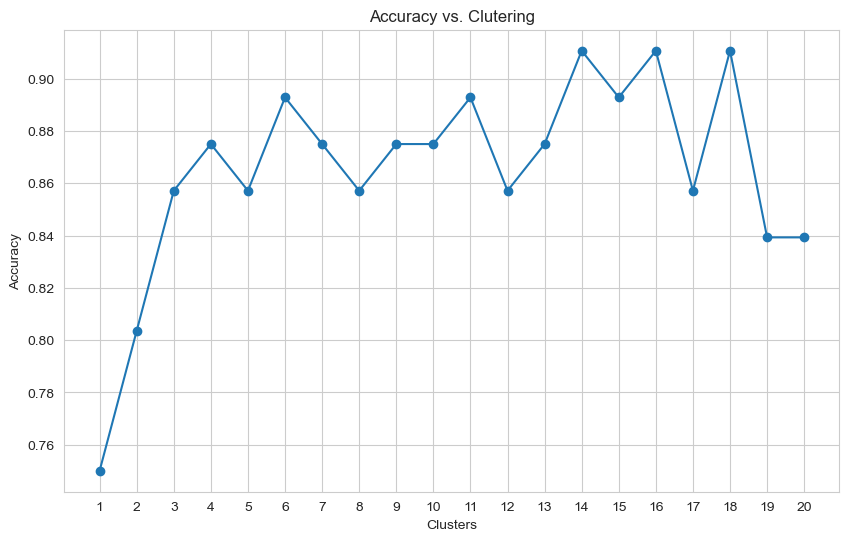

In [54]:
import matplotlib.pyplot as plt

# Define a range of values for n_neighbors
neighbors_range = range(1, 21)  # Example: from 1 to 20 neighbors

# Initialize an empty list to store accuracy values
accuracy_values = []

# Iterate over different values of n_neighbors
for n in neighbors_range:
    # Create KNN classifier with current value of n_neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracy_values, marker='o')
plt.title('Accuracy vs. Clutering')
plt.xlabel('Clusters')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# Assuming data is your dataset with columns: assignments, quizzes, exams, etc., and "pass/fail" column for the target variable

# Step 1: Prepare your data
X = data_copy[['As:1', 'As:2', 'As:3', 'As:4','Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']].copy().values  
y = data_copy["Grade"].values


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)  

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.875


In [56]:
knn_classifier.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [1.  ,

In [57]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [58]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['Pass','Fail']))


accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

specificity = recall_score(y_test, y_pred, pos_label=0)
print("Specificity:", specificity)

precision= precision_score(y_test,y_pred)
print("Precision:", precision)

recall=recall_score(y_test,y_pred)
print("Recall:", recall)
print()
print("Confusion Matrix:")
confusion_matrix(y_test,y_pred,labels =[0,1])

              precision    recall  f1-score   support

        Pass       0.83      0.92      0.87        26
        Fail       0.93      0.83      0.88        30

    accuracy                           0.88        56
   macro avg       0.88      0.88      0.87        56
weighted avg       0.88      0.88      0.88        56

Accuracy: 0.875
Sensitivity: 0.8333333333333334
Specificity: 0.9230769230769231
Precision: 0.9259259259259259
Recall: 0.8333333333333334

Confusion Matrix:


array([[24,  2],
       [ 5, 25]], dtype=int64)

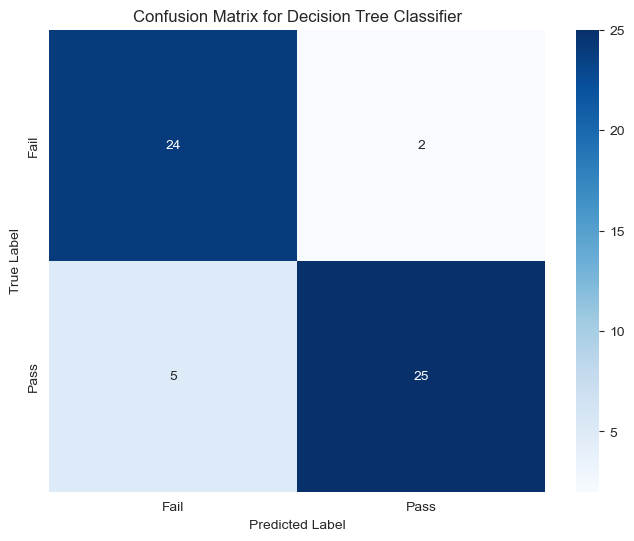

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the decision tree classifier (assuming 'clf' is your trained classifier)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [60]:

# Select the required features for Mid-II grade prediction
Predicture_attributes = data_copy[['As:1', 'As:2', 'As:3', 'As:4','Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']].copy()

# Make predictions
predictions = knn_classifier.predict(Predicture_attributes)

# Add predicted grades to the DataFrame
data_copy['Predicted_Grade_Mid'] = predictions

# Convert 0s and 1s to 'Pass' and 'Fail'
data_copy['Predicted_Grade_Mid'] = data_copy['Predicted_Grade_Mid'].map({0: 'Fail', 1: 'Pass'})

# Print the updated DataFrame

data_copy

C:\Users\Ahsan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade,Predicted_Grade_Mid,Predicted_Grade_FinalExam
1,1.975,2.700,2.571,3.000,2.125,2.812,1.5,0.900,0.9,0.0,...,D1,0.0,0.0,13.20,4.50,9.75,8.62,1,Pass,Pass
2,2.000,1.860,1.993,1.219,1.875,2.850,0.3,0.000,0.1,0.0,...,D1,0.0,0.0,10.57,1.00,3.37,3.93,0,Fail,Fail
3,2.125,1.890,2.571,2.325,1.625,1.875,0.0,0.000,0.2,0.0,...,D1,0.0,0.0,10.78,2.40,6.56,0.93,0,Fail,Fail
4,1.025,1.260,1.286,2.625,1.750,0.375,0.2,0.400,0.0,0.0,...,D1,0.0,0.0,7.94,2.60,5.06,2.81,0,Fail,Fail
5,2.150,1.950,2.679,0.375,2.750,0.938,0.6,0.200,0.0,0.0,...,D1,0.0,0.0,10.46,0.80,4.50,2.25,0,Fail,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2.331,2.121,0.000,2.850,2.200,1.533,1.2,1.133,0.1,0.0,...,D7,2.0,0.0,11.03,5.46,6.56,2.90,0,Fail,Pass
274,1.431,0.000,1.900,1.800,2.175,2.233,0.0,1.333,0.0,0.2,...,D7,2.0,0.0,9.53,5.13,3.37,1.59,0,Fail,Fail
275,1.938,2.186,1.483,1.680,2.000,1.600,0.8,0.933,0.2,0.0,...,D7,2.0,0.0,9.40,7.10,5.25,1.50,0,Fail,Pass
276,2.885,2.571,2.800,2.430,2.750,2.867,1.8,0.800,0.0,0.0,...,D7,2.0,0.0,13.87,6.20,8.06,4.31,1,Pass,Pass


## Before Final Exam

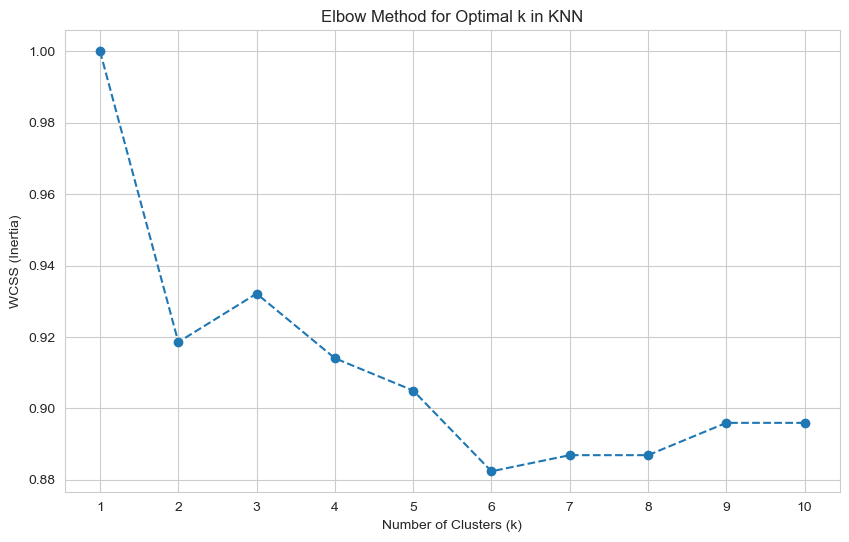

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming data is your dataset with columns: assignments, quizzes, exams, etc., and "pass/fail" column for the target variable

# Step 1: Prepare your data
X = data_copy[['Qz','As','S-I','S-II']].copy().values  # Features (attributes)
y = data_copy["Grade"].values

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create empty lists to store inertia (WCSS) and accuracies
inertia_values = []
accuracy_values = []

# Iterate over a range of k values (number of clusters)
for k in range(1, 11):  # Adjust the range as needed
    # Create KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

    # Calculate inertia (WCSS)
    inertia = knn_classifier.score(X_train, y_train)  # You may need to use a different metric here
    inertia_values.append(inertia)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k in KNN')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


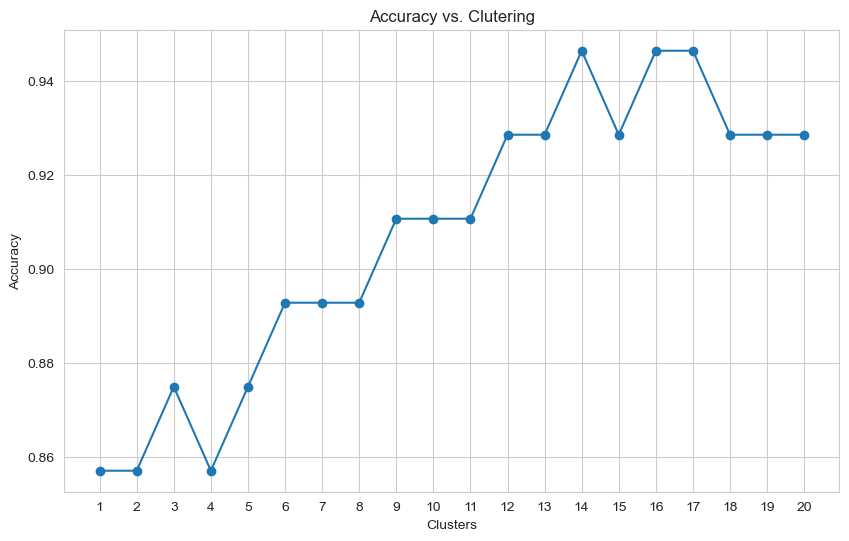

In [62]:
import matplotlib.pyplot as plt

# Define a range of values for n_neighbors
neighbors_range = range(1, 21)  # Example: from 1 to 20 neighbors

# Initialize an empty list to store accuracy values
accuracy_values = []

# Iterate over different values of n_neighbors
for n in neighbors_range:
    # Create KNN classifier with current value of n_neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracy_values, marker='o')
plt.title('Accuracy vs. Clutering')
plt.xlabel('Clusters')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# Assuming data is your dataset with columns: assignments, quizzes, exams, etc., and "pass/fail" column for the target variable

# Step 1: Prepare your data
X = data_copy[['Qz','As','S-I','S-II']].copy().values  
y = data_copy["Grade"].values


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=2)  # You can adjust the number of neighbors as needed

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8571428571428571


In [64]:
knn_classifier.predict_proba(X_test)

array([[0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0. , 1. ],
       [0. ,

In [65]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['Pass','Fail']))


accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

specificity = recall_score(y_test, y_pred, pos_label=0)
print("Specificity:", specificity)

precision= precision_score(y_test,y_pred)
print("Precision:", precision)

recall=recall_score(y_test,y_pred)
print("Recall:", recall)
print()
print("Confusion Matrix:")
confusion_matrix(y_test,y_pred,labels =[0,1])

              precision    recall  f1-score   support

        Pass       0.82      0.88      0.85        26
        Fail       0.89      0.83      0.86        30

    accuracy                           0.86        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.86      0.86      0.86        56

Accuracy: 0.8571428571428571
Sensitivity: 0.8333333333333334
Specificity: 0.8846153846153846
Precision: 0.8928571428571429
Recall: 0.8333333333333334

Confusion Matrix:


array([[23,  3],
       [ 5, 25]], dtype=int64)

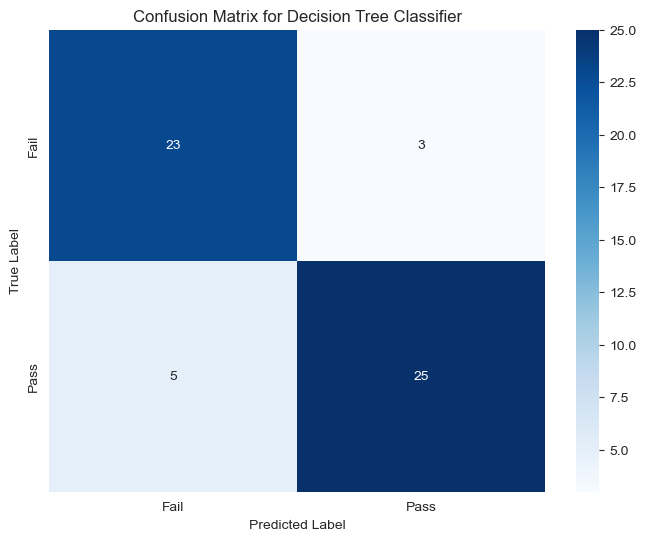

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the decision tree classifier (assuming 'clf' is your trained classifier)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [67]:

# Select the required features for Mid-II grade prediction
new_data_features_mid2 = data_copy[['Qz','As','S-I','S-II']].copy()

# Make predictions
predictions_mid2 = knn_classifier.predict(new_data_features_mid2)

# Add predicted grades to the DataFrame
data_copy['Predicted_Grade_FinalExam'] = predictions_mid2

# Convert 0s and 1s to 'Pass' and 'Fail'
data_copy['Predicted_Grade_FinalExam'] = data_copy['Predicted_Grade_FinalExam'].map({0: 'Fail', 1: 'Pass'})

# Print the updated DataFrame

data_copy

C:\Users\Ahsan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Sheet,Qz:8,As:7,As,Qz,S-I,S-II,Grade,Predicted_Grade_Mid,Predicted_Grade_FinalExam
1,1.975,2.700,2.571,3.000,2.125,2.812,1.5,0.900,0.9,0.0,...,D1,0.0,0.0,13.20,4.50,9.75,8.62,1,Pass,Pass
2,2.000,1.860,1.993,1.219,1.875,2.850,0.3,0.000,0.1,0.0,...,D1,0.0,0.0,10.57,1.00,3.37,3.93,0,Fail,Fail
3,2.125,1.890,2.571,2.325,1.625,1.875,0.0,0.000,0.2,0.0,...,D1,0.0,0.0,10.78,2.40,6.56,0.93,0,Fail,Fail
4,1.025,1.260,1.286,2.625,1.750,0.375,0.2,0.400,0.0,0.0,...,D1,0.0,0.0,7.94,2.60,5.06,2.81,0,Fail,Fail
5,2.150,1.950,2.679,0.375,2.750,0.938,0.6,0.200,0.0,0.0,...,D1,0.0,0.0,10.46,0.80,4.50,2.25,0,Fail,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2.331,2.121,0.000,2.850,2.200,1.533,1.2,1.133,0.1,0.0,...,D7,2.0,0.0,11.03,5.46,6.56,2.90,0,Fail,Fail
274,1.431,0.000,1.900,1.800,2.175,2.233,0.0,1.333,0.0,0.2,...,D7,2.0,0.0,9.53,5.13,3.37,1.59,0,Fail,Fail
275,1.938,2.186,1.483,1.680,2.000,1.600,0.8,0.933,0.2,0.0,...,D7,2.0,0.0,9.40,7.10,5.25,1.50,0,Fail,Fail
276,2.885,2.571,2.800,2.430,2.750,2.867,1.8,0.800,0.0,0.0,...,D7,2.0,0.0,13.87,6.20,8.06,4.31,1,Pass,Pass
